# How quickly does semantics change

In [3]:
from koselleck import *

In [6]:

def get_rate_of_change_data(key='dist_local'):
    df=pd.read_pickle('data/data.semantic_change_over_decades.1run.v2.pkl')
    df['period']=[f'{x[:4]}s->{y[:4]}s' for x,y in zip(df.period1,df.period2)]
    df['period_int1']=[int(y[:4]) for y in df.period1]
    df['period_int2']=[int(y[:4]) for y in df.period2]    
    return df

In [7]:
df=get_rate_of_change_data()
# df

In [18]:
def get_figdf1(randomize=False):
    dff=df.sample(frac=1)
    pdf=dff.groupby(['period','period1','period2']).mean().reset_index()
    if randomize:
        for c in ['period1','period2']:
            pdf[c]=list(pdf[c].sample(frac=1))
    
    pdf2=pd.DataFrame(pdf).rename(columns=dict(
        period1='period2',
        period2='period1',
    ))
    figdf=pdf.append(pdf2)
    
    
    
    figdf['period_int1']=figdf.period1.apply(lambda x: int(x[:4]))
    figdf['period_int2']=figdf.period2.apply(lambda x: int(x[:4]))
    figdf['perc_local_int']=figdf.dist_local.apply(lambda x: percentileofscore(figdf.dist_local, x)).apply(int)
    
    return figdf

In [105]:
figdf=get_figdf1()
figdf

,period,period1,period2,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,...,score2_abstractness,score_diff_abstractness,z_abstractness,is_clean_noiseaware,z_noiseaware,z_procrustes,z_local,period_int1,period_int2,perc_local_int
0,1700s->1710s,1700-1710,1710-1720,1487.5,50.016812,0.151043,1487.5,1487.5,1487.5,1487.5,...,6.741973e-17,-4.556245e-17,8.895037e-17,0.811029,1.273733e-16,2.180502e-16,1.124035e-16,1700,1710,22
1,1700s->1720s,1700-1710,1720-1730,1400.5,50.017857,0.166259,1400.5,1400.5,1400.5,1400.5,...,1.015061e-16,5.638347e-17,-2.013271e-17,0.765357,-2.176830e-17,1.420292e-16,5.555080e-17,1700,1720,31
2,1700s->1730s,1700-1710,1730-1740,1598.0,50.015649,0.235051,1598.0,1598.0,1598.0,1598.0,...,-1.059837e-16,4.857877e-17,-2.150949e-17,0.655399,-2.428331e-16,-2.517548e-17,4.687608e-17,1700,1730,54
3,1700s->1740s,1700-1710,1740-1750,1591.0,50.015718,0.228605,1591.0,1591.0,1591.0,1591.0,...,-7.343317e-17,-1.985209e-16,1.029600e-17,0.690663,-1.460462e-16,4.566887e-17,-1.248957e-16,1700,1740,51
4,1700s->1750s,1700-1710,1750-1760,1599.5,50.015635,0.246373,1599.5,1599.5,1599.5,1599.5,...,-5.110220e-17,-2.010066e-16,-1.145634e-18,0.619762,2.700223e-16,5.474740e-17,2.605448e-17,1700,1750,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1860s->1870s,1870-1880,1860-1870,2990.5,50.008361,0.053234,2990.5,2990.5,2990.5,2990.5,...,-3.394906e-16,-2.487512e-16,-3.618436e-17,0.983946,-2.738612e-16,3.772530e-17,-1.854704e-17,1870,1860,0
184,1860s->1880s,1880-1890,1860-1870,2990.5,50.008361,0.062832,2990.5,2990.5,2990.5,2990.5,...,-1.810425e-16,-2.417241e-17,-2.320700e-20,0.967391,1.282512e-16,-1.022965e-17,-3.470839e-17,1880,1860,3
185,1860s->1890s,1890-1900,1860-1870,2990.5,50.008361,0.070116,2990.5,2990.5,2990.5,2990.5,...,2.077120e-16,3.934979e-16,-2.929652e-17,0.960535,1.027420e-16,5.517697e-17,2.506356e-17,1890,1860,5
186,1870s->1880s,1880-1890,1870-1880,2995.0,50.008349,0.054580,2995.0,2995.0,2995.0,2995.0,...,-1.874903e-16,1.211346e-16,-1.672101e-17,0.983470,1.678589e-16,3.520310e-17,-5.520064e-17,1880,1870,0


In [106]:
figdf.pivot('period1','period2','dist_local')

period2,1700-1710,1710-1720,1720-1730,1730-1740,1740-1750,1750-1760,1760-1770,1770-1780,1780-1790,1790-1800,1800-1810,1810-1820,1820-1830,1830-1840,1840-1850,1850-1860,1860-1870,1870-1880,1880-1890,1890-1900
period1,,,,,,,,,,,,,,,,,,,,
1700-1710,NaN,0.052175,0.070277,0.123187,0.117156,0.135224,0.152046,0.162920,0.176148,0.173325,0.186842,0.200232,0.210687,0.213846,0.219800,0.224177,0.229575,0.231759,0.238368,0.242011
1710-1720,0.052175,NaN,0.051593,0.100243,0.100809,0.120191,0.135094,0.147495,0.159027,0.159555,0.175619,0.188765,0.202992,0.206911,0.211821,0.216791,0.223603,0.225560,0.231585,0.235689
1720-1730,0.070277,0.051593,NaN,0.096608,0.098273,0.122421,0.136433,0.148472,0.154098,0.158339,0.175543,0.190504,0.203601,0.208280,0.212043,0.216051,0.223967,0.226236,0.231224,0.234206
1730-1740,0.123187,0.100243,0.096608,NaN,0.061337,0.076552,0.088200,0.098700,0.110177,0.115997,0.134881,0.152258,0.171923,0.182020,0.190322,0.199147,0.211108,0.216901,0.224382,0.230757
1740-1750,0.117156,0.100809,0.098273,0.061337,NaN,0.063903,0.082335,0.095075,0.103453,0.109110,0.128705,0.149523,0.171441,0.181170,0.189278,0.197292,0.208629,0.215772,0.223085,0.228497
1750-1760,0.135224,0.120191,0.122421,0.076552,0.063903,NaN,0.046022,0.055237,0.064495,0.068098,0.083537,0.103842,0.123675,0.134081,0.142544,0.150797,0.161428,0.169155,0.177611,0.184418
1760-1770,0.152046,0.135094,0.136433,0.088200,0.082335,0.046022,NaN,0.043142,0.051856,0.054911,0.067881,0.085698,0.105075,0.116249,0.124615,0.134052,0.144012,0.152620,0.161129,0.169020
1770-1780,0.162920,0.147495,0.148472,0.098700,0.095075,0.055237,0.043142,NaN,0.039971,0.043113,0.053820,0.070153,0.087241,0.098992,0.107793,0.117494,0.127672,0.137786,0.146590,0.154954
1780-1790,0.176148,0.159027,0.154098,0.110177,0.103453,0.064495,0.051856,0.039971,NaN,0.037081,0.047801,0.062463,0.079053,0.089835,0.099148,0.108223,0.119084,0.129009,0.137478,0.145402


In [20]:
get_figdf1(randomize=True)

,period,period1,period2,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,...,score2_abstractness,score_diff_abstractness,z_abstractness,is_clean_noiseaware,z_noiseaware,z_procrustes,z_local,period_int1,period_int2,perc_local_int
0,1700s->1710s,1780-1790,1800-1810,1487.5,50.016812,0.151043,1487.5,1487.5,1487.5,1487.5,...,5.995354e-17,-4.166136e-17,4.702302e-17,0.811029,1.153900e-16,1.916572e-16,1.355021e-16,1780,1800,22
1,1700s->1720s,1710-1720,1880-1890,1400.5,50.017857,0.166259,1400.5,1400.5,1400.5,1400.5,...,1.907799e-16,5.099096e-17,1.467080e-17,0.765357,-1.447255e-17,1.752566e-16,5.275542e-17,1710,1880,31
2,1700s->1730s,1750-1760,1780-1790,1598.0,50.015649,0.235051,1598.0,1598.0,1598.0,1598.0,...,-1.211603e-16,4.825300e-17,-4.308847e-18,0.655399,-1.875391e-16,-3.808465e-17,5.796094e-17,1750,1780,54
3,1700s->1740s,1700-1710,1870-1880,1591.0,50.015718,0.228605,1591.0,1591.0,1591.0,1591.0,...,-1.009357e-16,-2.012432e-16,4.711729e-18,0.690663,-1.596404e-16,3.695217e-17,-1.513425e-16,1700,1870,51
4,1700s->1750s,1710-1720,1880-1890,1599.5,50.015635,0.246373,1599.5,1599.5,1599.5,1599.5,...,-6.005897e-18,-2.023953e-16,-1.850372e-17,0.619762,3.023778e-16,6.564827e-17,5.388383e-17,1710,1880,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1860s->1870s,1850-1860,1720-1730,2990.5,50.008361,0.053234,2990.5,2990.5,2990.5,2990.5,...,-3.545287e-16,-2.492339e-16,-2.198167e-17,0.983946,-2.711321e-16,2.428381e-17,-2.961214e-18,1850,1720,0
184,1860s->1880s,1830-1840,1730-1740,2990.5,50.008361,0.062832,2990.5,2990.5,2990.5,2990.5,...,-1.874012e-16,-1.957743e-17,6.952818e-18,0.967391,1.281955e-16,-1.639343e-17,-2.617518e-17,1830,1730,3
185,1860s->1890s,1810-1820,1780-1790,2990.5,50.008361,0.070116,2990.5,2990.5,2990.5,2990.5,...,2.847221e-16,3.941849e-16,-2.624016e-17,0.960535,1.120620e-16,8.453847e-17,4.113673e-17,1810,1780,5
186,1870s->1880s,1840-1850,1770-1780,2995.0,50.008349,0.054580,2995.0,2995.0,2995.0,2995.0,...,-1.879352e-16,1.218020e-16,-1.712884e-17,0.983470,1.561431e-16,4.048866e-17,-4.611022e-17,1840,1770,0


In [21]:
def plot_fig1(figdf1=None,**y):
    if figdf1 is None: figdf1=get_figdf1(**y)
    fig=p9.ggplot(
        figdf1.fillna(0),
        p9.aes(x='factor(period_int1)',y='factor(period_int2)',fill='perc_local_int', label='perc_local_int'))
    fig+=p9.geom_tile()
    fig+=p9.geom_text(size=5)
    fig+=p9.scale_fill_distiller()
    return fig

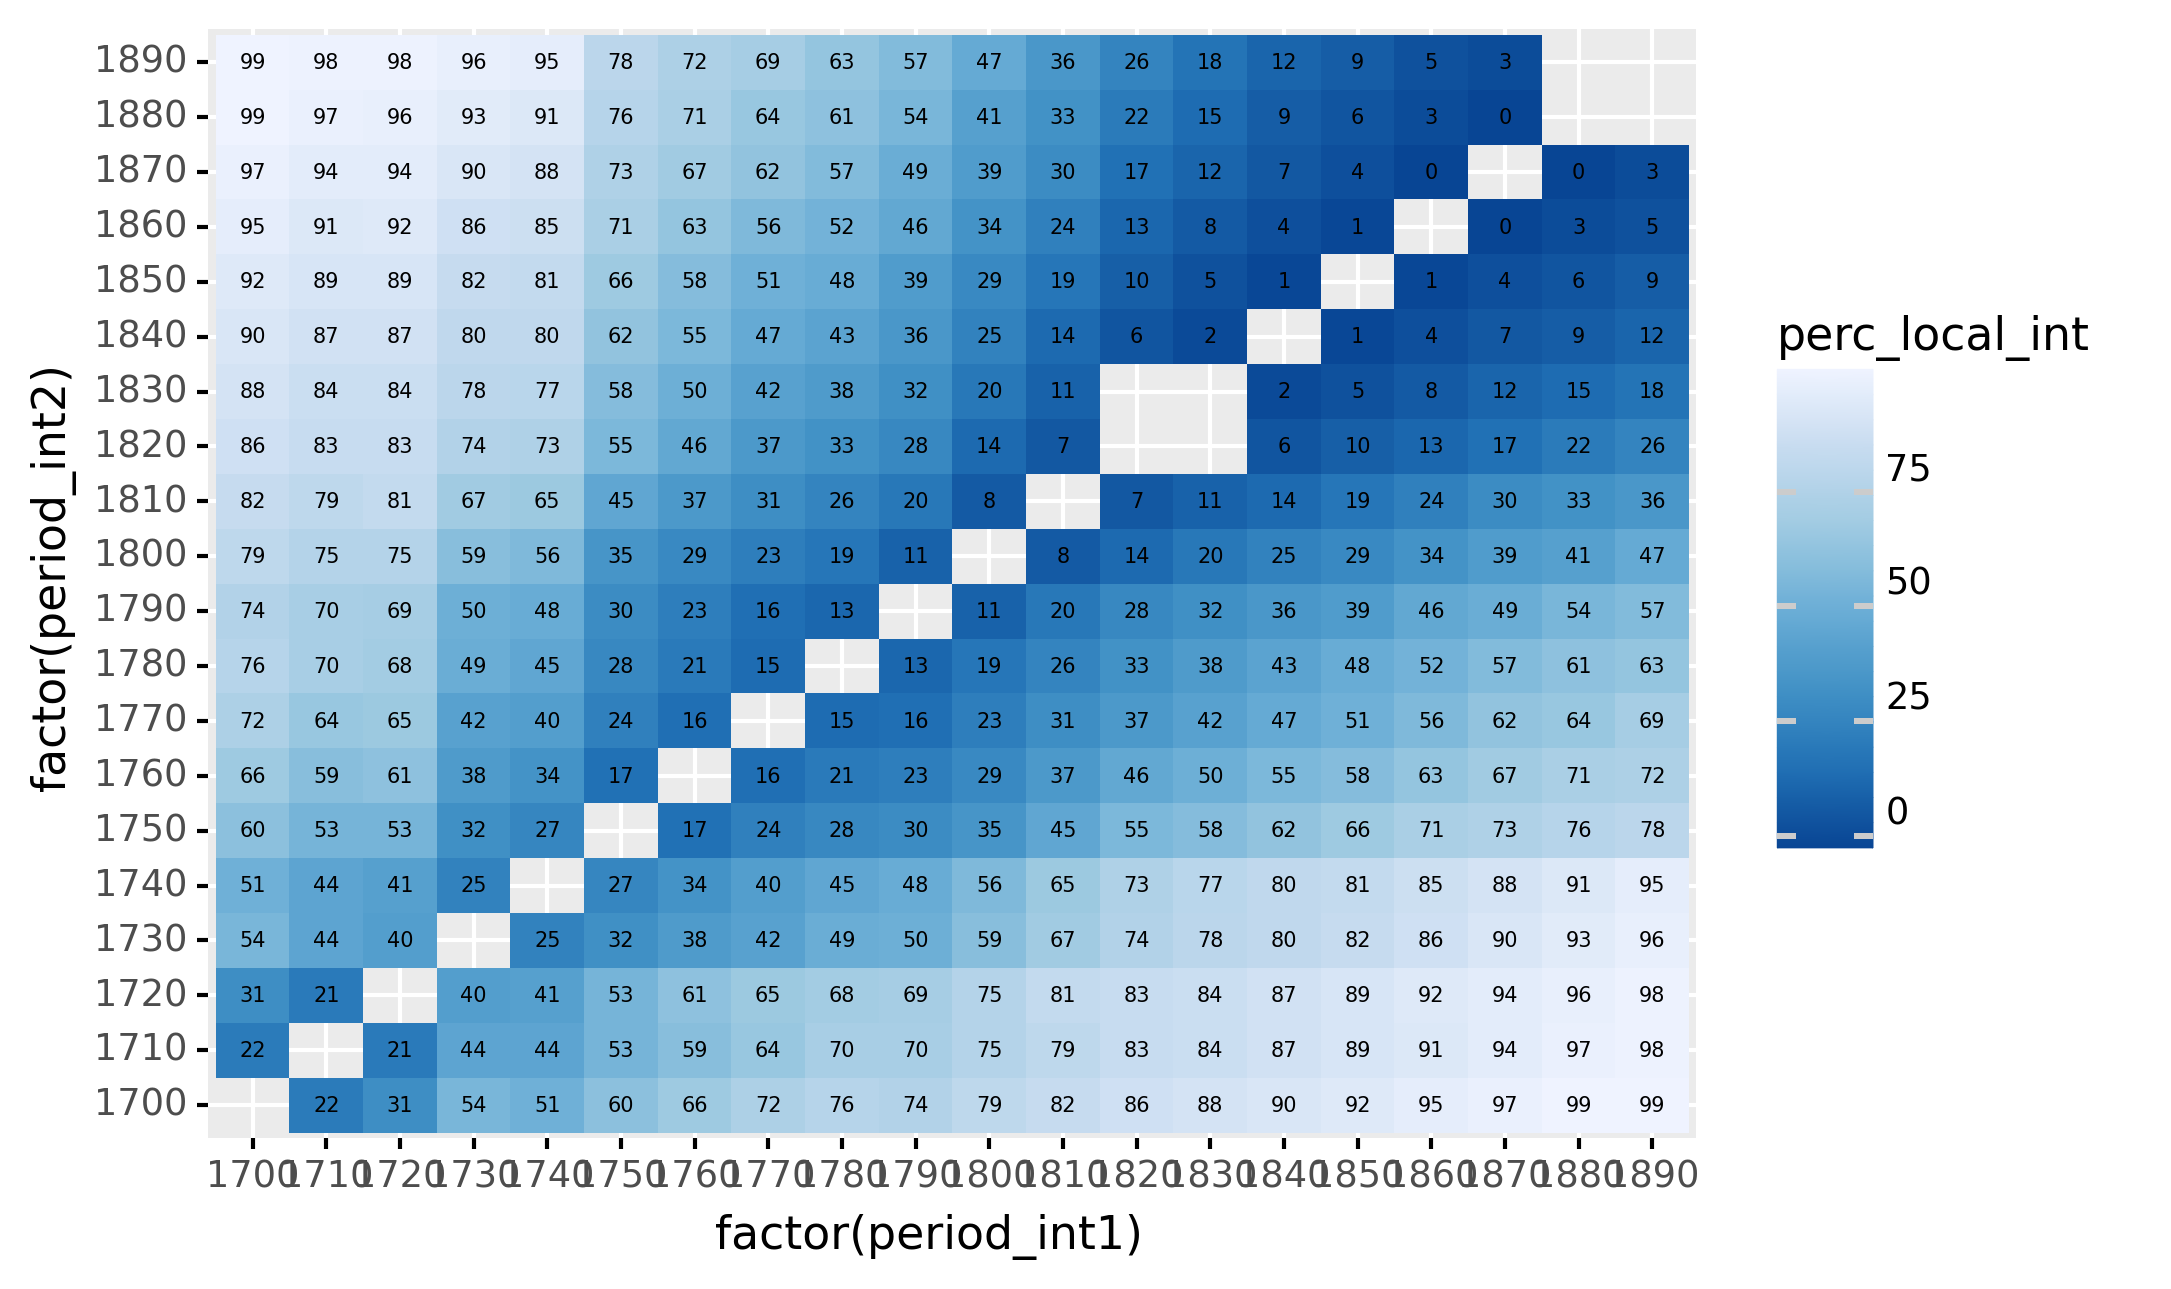

<ggplot: (8782290069837)>

In [22]:
plot_fig1()

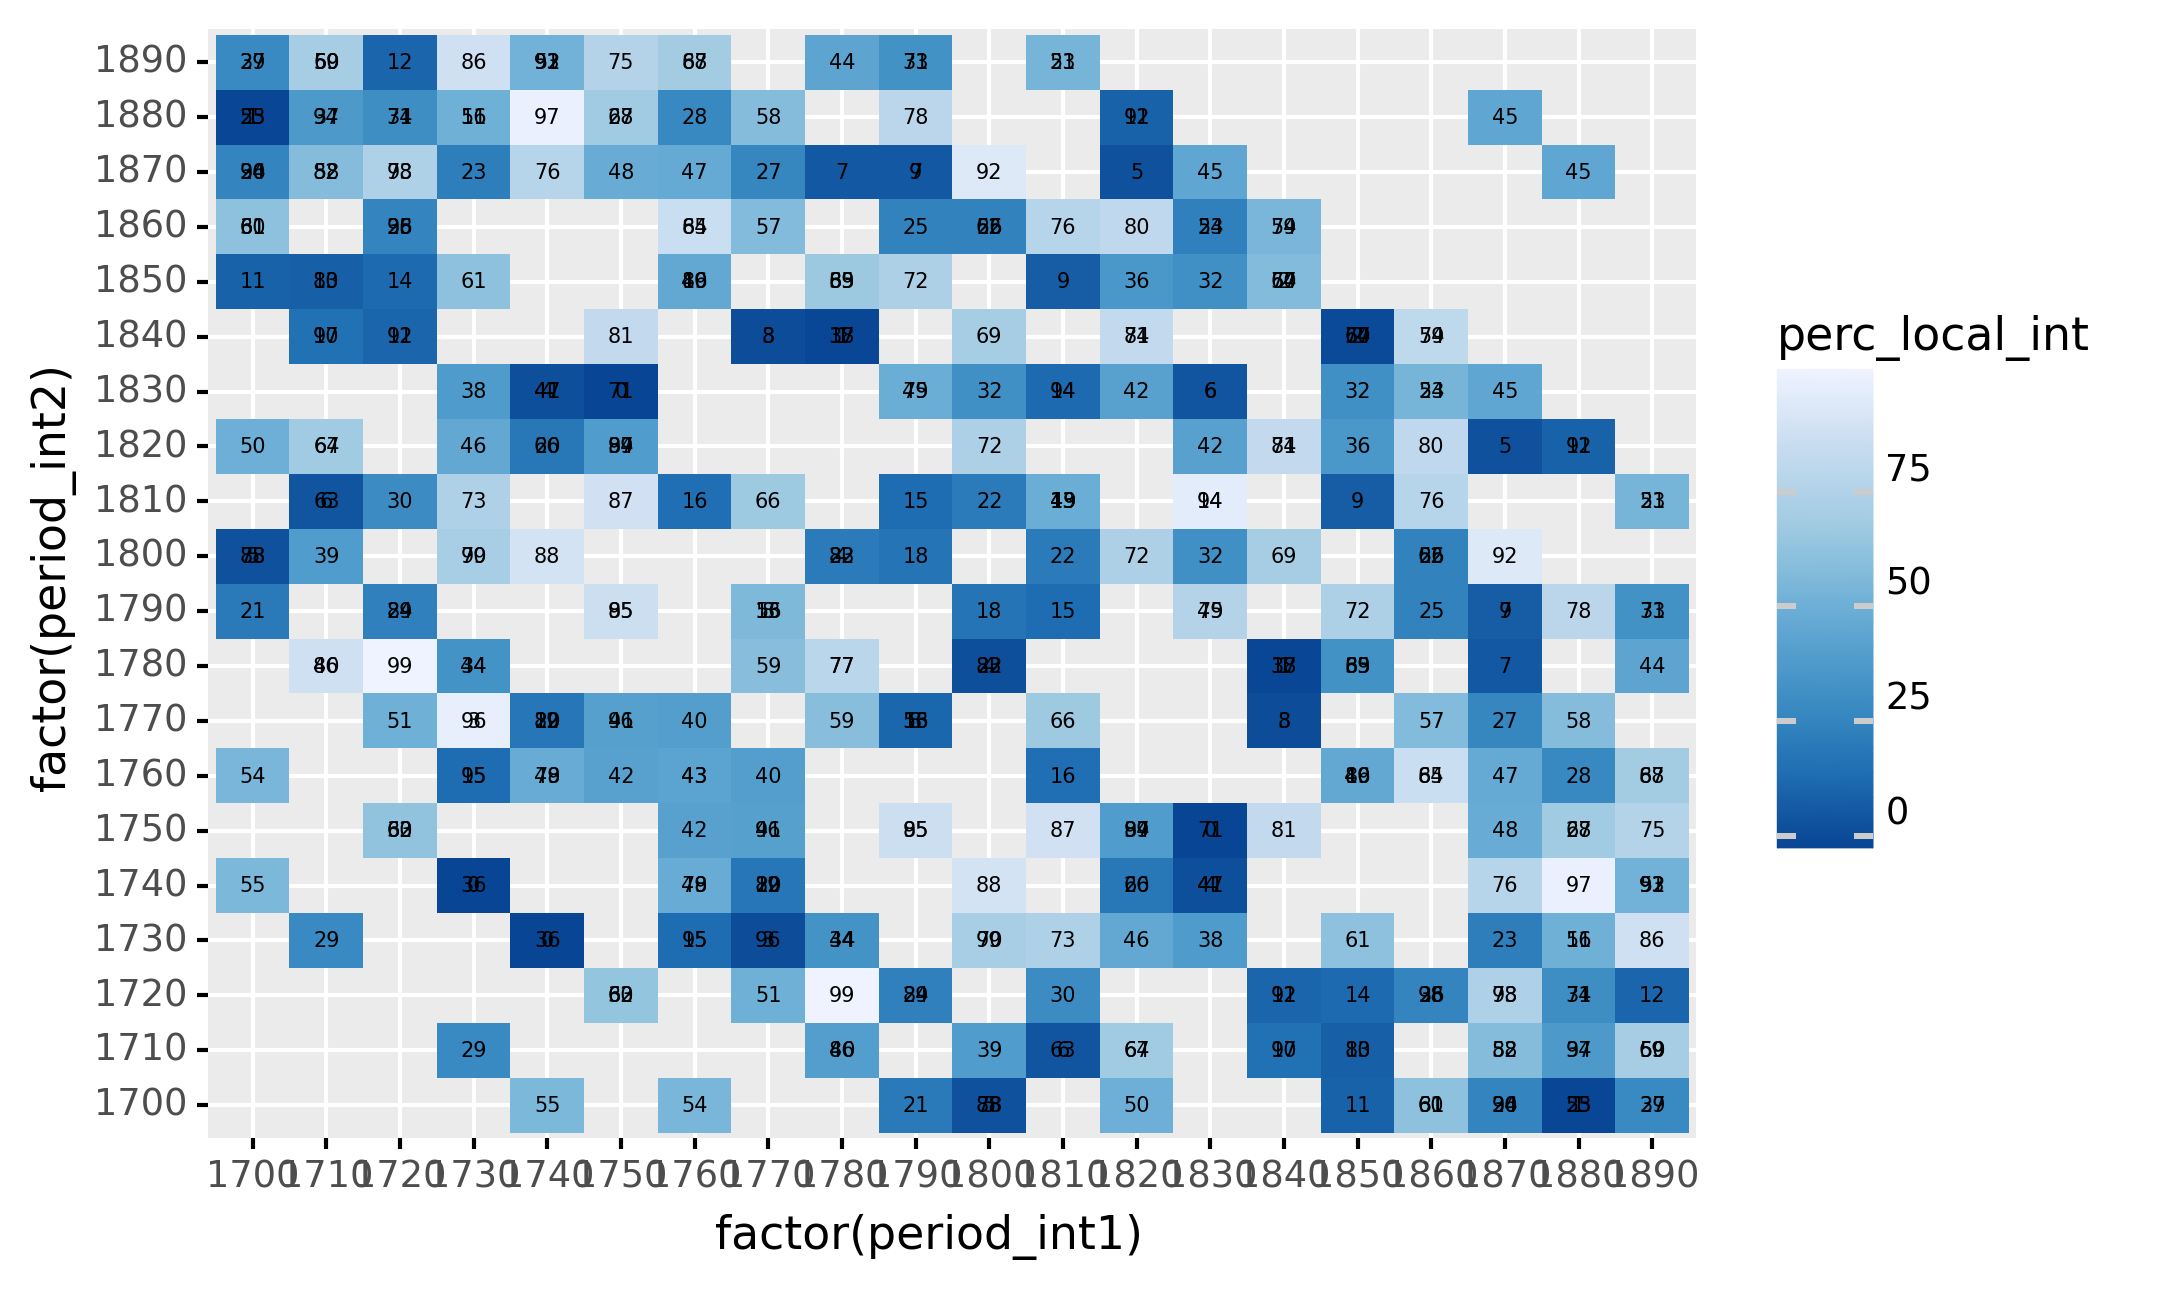

<ggplot: (8782236682153)>

In [23]:
plot_fig1(randomize=True)

## Novelty?

In [47]:
o=[]
for pi2,gdf in figdf.query('period2>period1').groupby('period_int2'):
# for pi2,gdf in figdf.groupby('period_int2'):
    gdf=gdf.sort_values('period_int1')
#     display(gdf)
    for i in range(2,len(gdf)):
        window=gdf.iloc[i-2:i+1]
#         display(window)
        windowavg=window.mean()
#         windowavg['period_int2']=int(gdf.iloc[i].period_int2)
        odx={
            'period_int1':gdf.iloc[i].period_int1,
            'period_int2':gdf.iloc[i].period_int2,
            'dist_local':windowavg.dist_local
        }
        o.append(odx)
odf=pd.DataFrame(o)
figdf3=odf.groupby('period_int2').mean().reset_index()
figdf3

,period_int2,period_int1,dist_local
0,1730,1720,0.106680
1,1740,1725,0.096110
2,1750,1730,0.106653
3,1760,1735,0.108902
4,1770,1740,0.109218
5,1780,1745,0.107475
6,1790,1750,0.101672
7,1800,1755,0.108347
8,1810,1760,0.116429
9,1820,1765,0.124613


In [48]:
odf

,period_int1,period_int2,dist_local
0,1720,1730,0.106680
1,1720,1740,0.105413
2,1730,1740,0.086807
3,1720,1750,0.125945
4,1730,1750,0.106388
...,...,...,...
146,1830,1890,0.064411
147,1840,1890,0.048014
148,1850,1890,0.036388
149,1860,1890,0.027341


In [104]:
dfpiv=odf.pivot('period_int1','period_int2','dist_local').fillna(0)
dfpiv

period_int2,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890
period_int1,,,,,,,,,,,,,,,,,
1720,0.10668,0.105413,0.125945,0.141191,0.152962,0.163091,0.163740,0.179335,0.193167,0.205760,0.209679,0.214555,0.219006,0.225715,0.227852,0.233726,0.237302
1730,0.00000,0.086807,0.106388,0.119909,0.131555,0.141101,0.144630,0.162014,0.177176,0.192839,0.199070,0.204729,0.210663,0.219559,0.222899,0.229063,0.233551
1740,0.00000,0.000000,0.087625,0.102322,0.114082,0.122576,0.127815,0.146376,0.164095,0.182322,0.190490,0.197214,0.204163,0.214568,0.219636,0.226230,0.231153
1750,0.00000,0.000000,0.000000,0.072185,0.083004,0.092708,0.097735,0.115708,0.135207,0.155680,0.165757,0.174048,0.182412,0.193722,0.200609,0.208359,0.214557
1760,0.00000,0.000000,0.000000,0.000000,0.064485,0.073268,0.077373,0.093374,0.113021,0.133397,0.143833,0.152146,0.160714,0.171356,0.179182,0.187275,0.193978
1770,0.00000,0.000000,0.000000,0.000000,0.000000,0.052107,0.055374,0.068413,0.086564,0.105330,0.116441,0.124984,0.134115,0.144371,0.153187,0.161776,0.169464
1780,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045035,0.056501,0.072771,0.090456,0.101692,0.110519,0.119923,0.130256,0.139805,0.148399,0.156459
1790,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045056,0.060226,0.077049,0.088135,0.096979,0.105972,0.116874,0.126756,0.135625,0.143561
1800,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045630,0.061091,0.072058,0.080662,0.089358,0.100702,0.110813,0.119582,0.127599


In [36]:
from pyod.models.copod import COPOD
clf = COPOD()
dfpiv=dfpiv.sample(frac=1)
dfpiv_train,dfpiv_test=dfpiv.iloc[:-1], dfpiv.iloc[-1:]
clf.fit(dfpiv_train)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores
y_test_scores = clf.decision_function(dfpiv_test)  # outlier scores
y_train_scores, y_test_scores

(array([23.27234919, 17.0178388 , 27.9415106 , 15.48659146, 17.02080452,
        16.31454416, 19.28552009, 18.54311244, 18.0308583 , 15.99091484,
        43.54557609, 16.22114313, 21.66937487, 35.13222366, 29.38465407,
        21.82474602, 34.43908902, 26.85732751, 26.95296209]),
 array([25.50211049]))

In [98]:
def copod_loo(df,nruns=5,randomize=[True,False]):
    from pyod.models.copod import COPOD
    o=[]
    for rnd in randomize:
        for nr in tqdm(range(nruns),total=nruns):
            rdf=rnddf=df.sample(frac=1).fillna(0)
            if rnd:
                rnddf.columns = random.sample(list(rnddf.columns), len(rnddf.columns))
                rnddf.index = random.sample(list(rnddf.index), len(rnddf.index))

            for i,row in rdf.iterrows():
#                 rowdf=rdf.iloc[i:i+1]
                rowdf=pd.DataFrame([row])
                otherrows=rdf.drop(i)
#                 display(rowdf)
#                 display(otherrows)
#                 stop
                clf = COPOD()
                clf.fit(otherrows)
                # get outlier scores
                y_train_scores = clf.decision_scores_  # raw outlier scores
                y_test_scores = clf.decision_function(rowdf)  # outlier scores
                o+=[{
                    'period':row.name,
                    'outlierscore':y_test_scores[0],
                    'run':nr,
                    'predict':clf.predict(rowdf)[0],
                    'randomized':rnd
                }]
    return pd.DataFrame(o)#.groupby('period')#.mean().sort_values('outlierscore')
        

In [100]:
cdf=copod_loo(dfpiv,nruns=100)
cdf

100%|██████████| 100/100 [00:19<00:00,  5.22it/s]


,period,outlierscore,run,predict,randomized
0,1820,7.181705,0,0,True
1,1750,8.064777,0,0,True
2,1740,7.167104,0,0,True
3,1860,7.929307,0,0,True
4,1800,9.590746,0,0,True
...,...,...,...,...,...
3195,1800,7.170492,99,0,False
3196,1870,10.912502,99,0,False
3197,1840,8.064777,99,0,False
3198,1770,12.000926,99,0,False


In [102]:
cdfs=cdf.groupby(['period','randomized']).mean().reset_index().sort_values('outlierscore')
cdfs

,period,randomized,outlierscore,run,predict
20,1820,False,7.167104,49.5,0.00
16,1800,False,7.170492,49.5,0.00
18,1810,False,7.181705,49.5,0.00
22,1830,False,7.587701,49.5,0.00
14,1790,False,7.929307,49.5,0.00
24,1840,False,8.064777,49.5,0.00
26,1850,False,8.712842,49.5,0.00
28,1860,False,9.590746,49.5,0.00
12,1780,False,9.684171,49.5,0.00
30,1870,False,10.912502,49.5,0.00


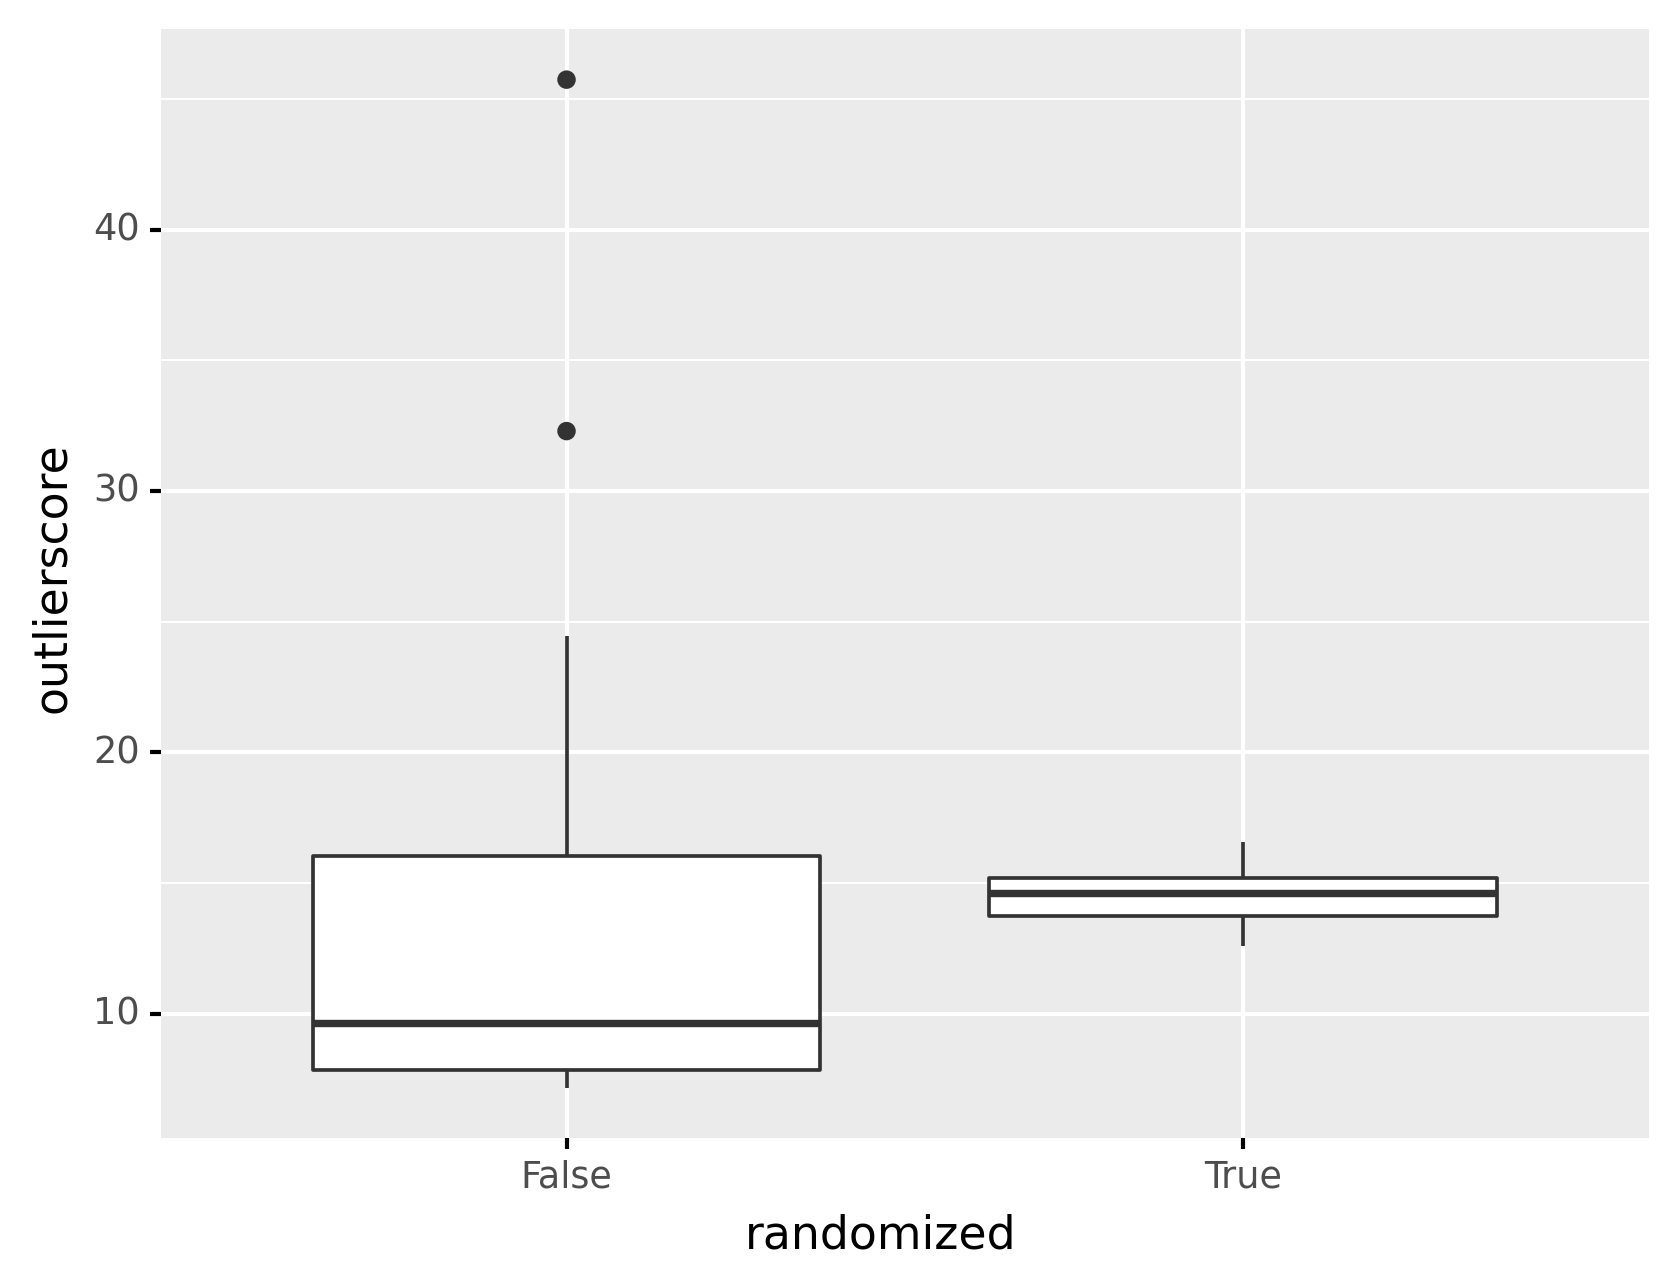

<ggplot: (8782353486321)>

In [103]:
p9.ggplot(cdfs, p9.aes(x='randomized',y='outlierscore')) + p9.geom_boxplot()

In [ ]:
# cdf.groupby('period').mean().sort_values('outlierscore')


In [35]:
# from pyod.utils.data import evaluate_print

# # evaluate and print the results
# print("\nOn Training Data:")
# evaluate_print(clf_name, y_train, y_train_scores)
# print("\nOn Test Data:")
# evaluate_print(clf_name, y_test, y_test_scores)

In [166]:
# plot_fig1(randomize=True)

In [167]:
figdf2=figdf.groupby(['period_int1','period_int2']).mean().reset_index()
# figdf2=figdf.groupby(['period_int2']).mean().reset_index()
# figdf2=figdf2[figdf2.period_int1.isin({1700,1750,1800,1850})]
figdf2

,period_int1,period_int2,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,...,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,z_abstractness,is_clean_noiseaware,z_noiseaware,z_procrustes,z_local
0,1700,1710,1487.5,50.016812,0.151043,1487.5,1487.5,1487.5,1487.5,50.016812,...,0.270617,0.052175,1.073639e-16,1.049000e-16,-5.685507e-17,-1.252827e-16,0.811029,6.945054e-16,-6.170063e-16,1.405884e-16
1,1700,1720,1400.5,50.017857,0.166259,1400.5,1400.5,1400.5,1400.5,50.017857,...,0.290684,0.070277,5.267612e-17,2.169891e-16,4.358617e-17,-3.467861e-16,0.765357,-4.226778e-16,1.379769e-15,-9.445619e-16
2,1700,1730,1598.0,50.015649,0.235051,1598.0,1598.0,1598.0,1598.0,50.015649,...,0.396043,0.123187,-1.758287e-16,2.189172e-17,1.240824e-16,2.212106e-16,0.655399,-6.824657e-17,-1.156995e-15,4.142748e-16
3,1700,1740,1591.0,50.015718,0.228605,1591.0,1591.0,1591.0,1591.0,50.015718,...,0.387888,0.117156,6.903556e-17,-2.582726e-17,-2.352135e-16,4.458343e-16,0.690663,5.071217e-16,7.625323e-16,-5.055162e-16
4,1700,1750,1599.5,50.015635,0.246373,1599.5,1599.5,1599.5,1599.5,50.015635,...,0.411788,0.135224,2.275298e-16,0.000000e+00,-2.029247e-16,1.774690e-16,0.619762,1.008505e-15,-9.370588e-16,1.735531e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1890,1830,2964.5,50.008435,0.110093,2964.5,2964.5,2964.5,2964.5,50.008435,...,0.195830,0.046759,-2.347987e-16,5.159316e-16,3.348367e-16,-3.576386e-16,0.929487,2.161264e-17,1.698971e-15,-1.109980e-15
372,1890,1840,2978.0,50.008396,0.094845,2978.0,2978.0,2978.0,2978.0,50.008396,...,0.171208,0.035561,-2.162267e-16,4.667469e-16,5.122215e-16,-3.129878e-16,0.942065,4.511365e-16,5.241073e-16,5.487168e-16
373,1890,1850,2986.0,50.008374,0.082714,2986.0,2986.0,2986.0,2986.0,50.008374,...,0.151429,0.026844,6.775038e-17,-4.782735e-17,3.195087e-16,1.483768e-16,0.954781,-4.501135e-16,-1.401585e-16,3.887919e-17
374,1890,1860,2990.5,50.008361,0.070116,2990.5,2990.5,2990.5,2990.5,50.008361,...,0.130003,0.019619,-3.947418e-16,2.434734e-16,4.387638e-16,-5.616652e-16,0.960535,-4.366630e-16,4.209193e-16,9.406634e-16


,period_int2,period_int1,dist_local
0,1730,1720,0.106680
1,1740,1725,0.096110
2,1750,1730,0.106653
3,1760,1735,0.108902
4,1770,1740,0.109218
5,1780,1745,0.107475
6,1790,1750,0.101672
7,1800,1755,0.108347
8,1810,1760,0.116429
9,1820,1765,0.124613


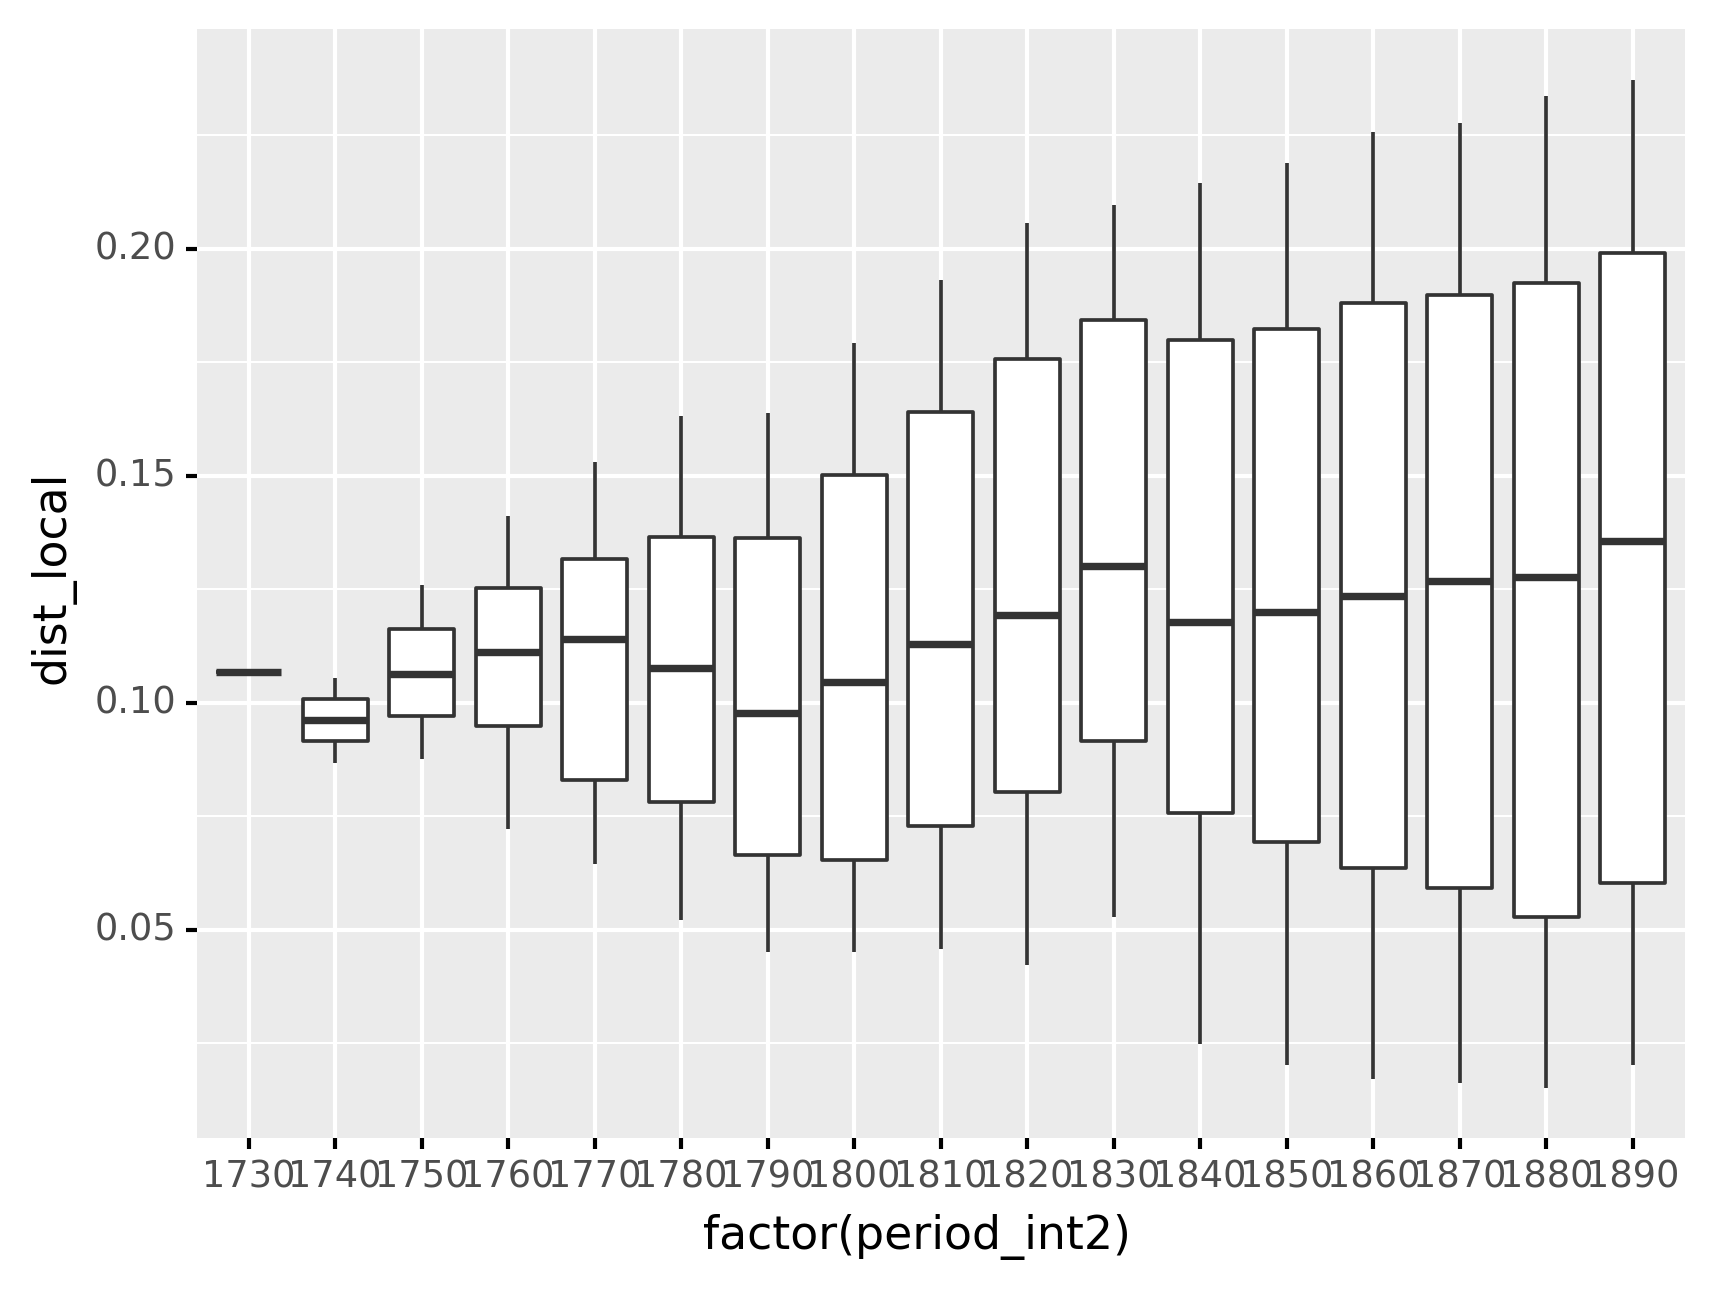

<ggplot: (8785849358929)>

In [169]:
p9.ggplot(odf, p9.aes('factor(period_int2)','dist_local')) + p9.geom_boxplot()

In [ ]:

p9.ggplot(
    odf,
    p9.aes(
        x='period_int2',
        y='dist_local',
        color='period_int1',
        fill='period_int1',
        group='period_int1'
    )
) + p9.geom_point() + p9.geom_area() + p9.geom_smooth(method='loess')

In [ ]:
distdf=figdf.pivot('period_int1','period_int2','dist_local')
distdf

In [ ]:

def plot_dendro(df):
    import plotly.figure_factory as ff
    X=df.fillna(0).values
    fig = ff.create_dendrogram(X, orientation='bottom', labels=df.index, color_threshold=.3)
    fig.update_layout(width=800, height=600)
    fig.show()

In [ ]:
plot_dendro(distdf)

### Network?

In [109]:
g=to_semnet_from_dist(distdf,topn=2)

In [110]:
# import sys
# sys.path.append('../../github/hairball/')
# import hairball as hb
# hb.__file__

In [112]:
hg=hb.Hairball(g)
hb.use_notebook()
hg.draw_bokeh()

Building df_edges from g: 100%|██████████| 25/25 [00:00<00:00, 181728.94it/s]


Loading BokehJS ...

In [30]:
hg.draw_bokeh??

Signature:
hg.draw_bokeh(
    title='Networkx Graph',
    save_to=None,
    color_by=None,
    size_by=None,
    default_color='skyblue',
    default_size=15,
    min_size=5,
    max_size=30,
)
Docstring: <no docstring>
Source:   
    def draw_bokeh(self,
        title='Networkx Graph', 
        save_to=None,
        color_by=None,
        size_by=None,
        default_color='skyblue',
        default_size=15,
        min_size=5,
        max_size=30,
    ):
        from bokeh.io import output_notebook, show, save
        from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
        from bokeh.plotting import figure
        from bokeh.plotting import from_networkx
        from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
        from bokeh.transform import linear_cmap
        from networkx.algorithms import community

        #Establish which categories will appear when hovering over each

In [19]:
hb??

Type:        module
String form: <module 'hairball' from '../../github/hairball/hairball.py'>
File:        ~/github/hairball/hairball.py
Source:     
import os,sys,json
import networkx as nx
import pandas as pd
from tqdm import tqdm
import numpy as np

def use_notebook():
    from bokeh.io import output_notebook
    output_notebook()

def is_url(x): return type(x)==str and x.strip().startswith('http')
def is_path(x): 
    return type(x) == str and os.path.exists(x)
def is_graph(x): return type(x) in {nx.Graph, nx.DiGraph}

def tupper(x): return x[0].upper()+x[1:]


def condense_booknlp_output(df=None,url=None):
    if df is None and url: df=pd.read_csv(url)
    if df is None: return None
    
    nameld=[]
    gby='name_real'
    other_cols='gender  race    class   other   notes'.split()
    for name,namedf in df.groupby(gby):
        #names=  ', '.join(tupper(x) for x in namedf.names)
        names = {tupper(nm.strip())
                 for nms in namedf.names
                 for nm 

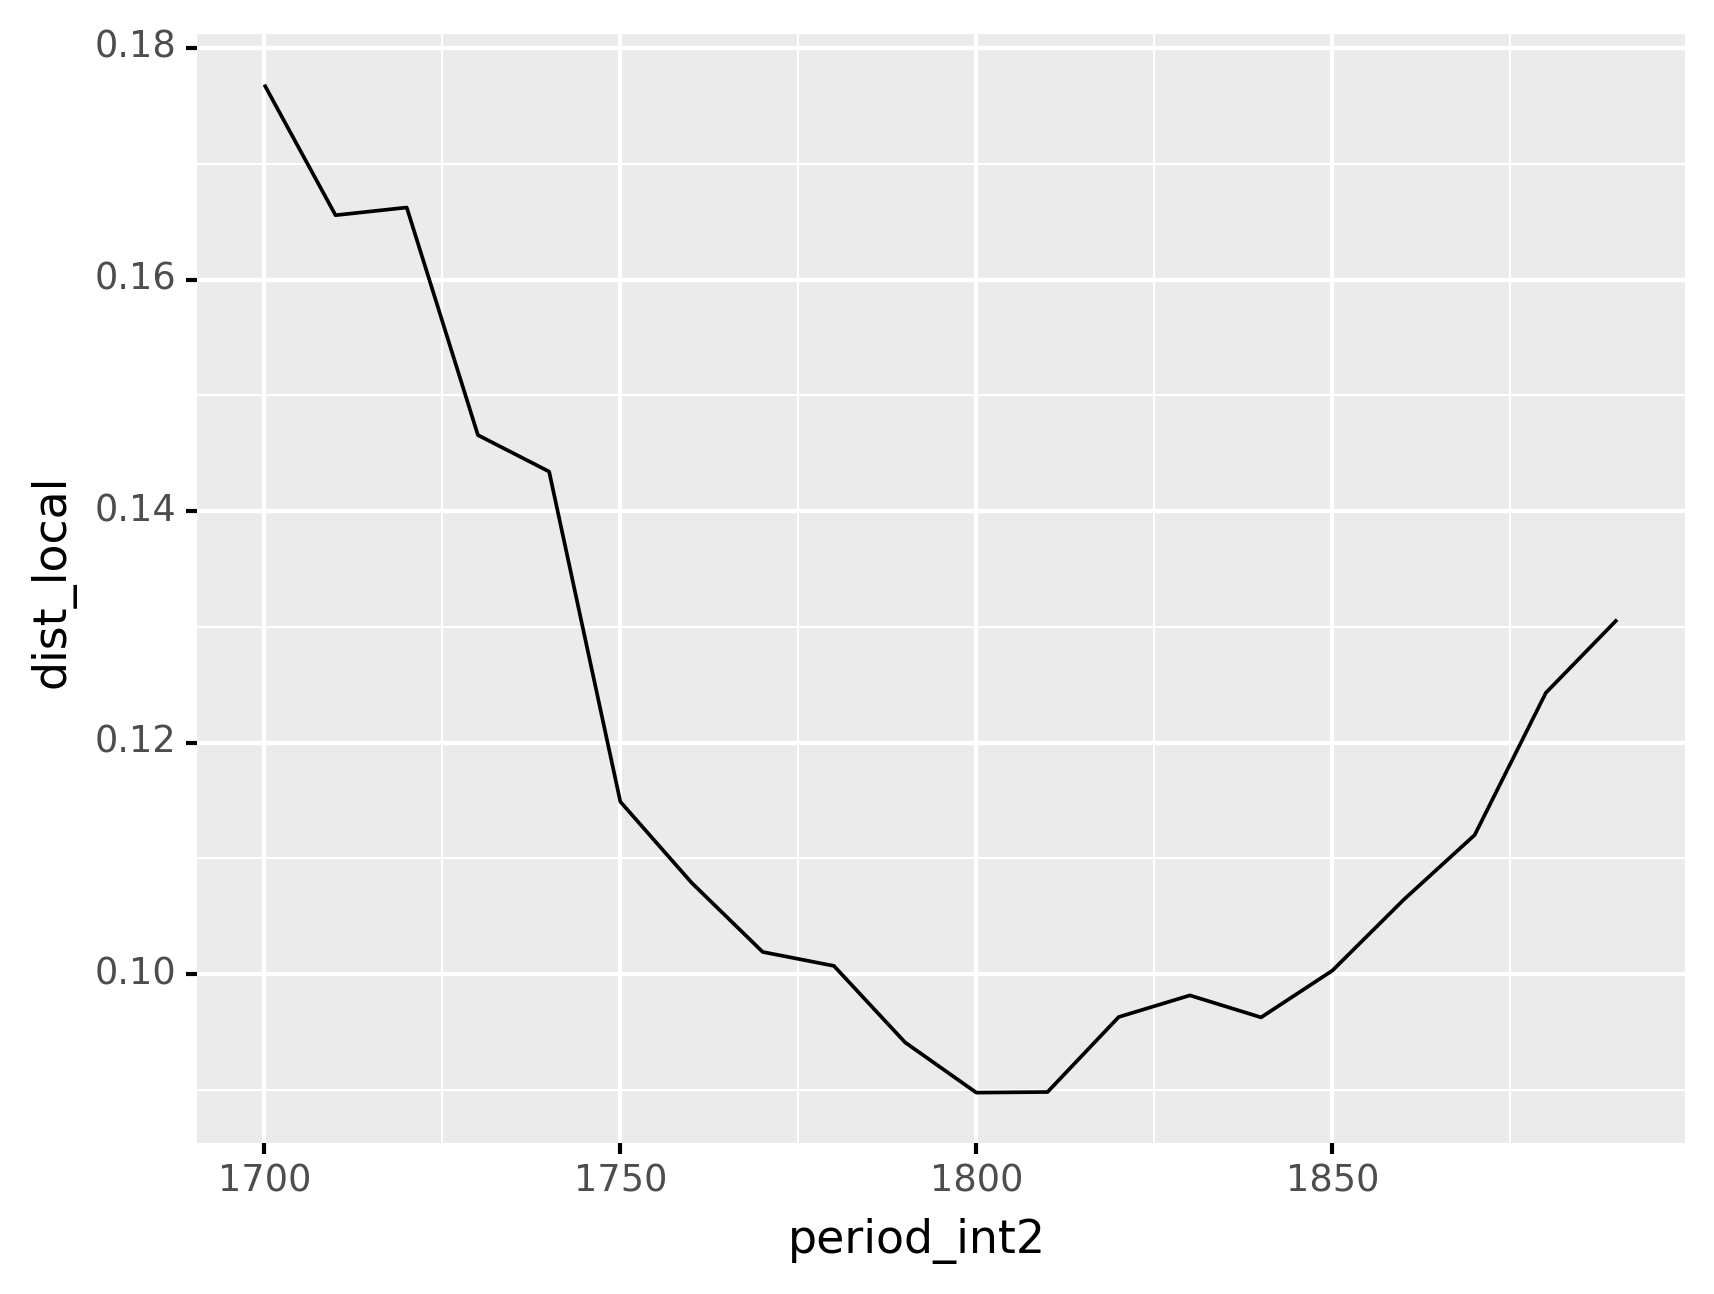

<ggplot: (8766841285949)>

In [91]:
p9.ggplot(
    figdf2,
    p9.aes(
        x='period_int2',
        y='dist_local',
    )
) + p9.geom_line()

In [35]:
pdf[pdf.period_int1==1700]

,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,score1_abstractness,score2_abstractness,score_diff_abstractness,z_abstractness,is_clean_noiseaware,z_noiseaware,z_procrustes,z_local,period_int1,period_int2
period,,,,,,,,,,,,,,,,,,,,,
1700s->1710s,1487.5,50.016812,0.151043,1487.5,1487.5,1487.5,1487.5,50.016812,50.016812,50.016812,...,1.073639e-16,1.049000e-16,-5.685507e-17,-1.252827e-16,0.811029,6.945054e-16,-6.170063e-16,1.405884e-16,1700,1710
1700s->1720s,1400.5,50.017857,0.166259,1400.5,1400.5,1400.5,1400.5,50.017857,50.017857,50.017857,...,5.267612e-17,2.169891e-16,4.358617e-17,-3.467861e-16,0.765357,-4.226778e-16,1.379769e-15,-9.445619e-16,1700,1720
1700s->1730s,1598.0,50.015649,0.235051,1598.0,1598.0,1598.0,1598.0,50.015649,50.015649,50.015649,...,-1.758287e-16,2.189172e-17,1.240824e-16,2.212106e-16,0.655399,-6.824657e-17,-1.156995e-15,4.142748e-16,1700,1730
1700s->1740s,1591.0,50.015718,0.228605,1591.0,1591.0,1591.0,1591.0,50.015718,50.015718,50.015718,...,6.903556e-17,-2.582726e-17,-2.352135e-16,4.458343e-16,0.690663,5.071217e-16,7.625323e-16,-5.055162e-16,1700,1740
1700s->1750s,1599.5,50.015635,0.246373,1599.5,1599.5,1599.5,1599.5,50.015635,50.015635,50.015635,...,2.275298e-16,0.000000e+00,-2.029247e-16,1.774690e-16,0.619762,1.008505e-15,-9.370588e-16,1.735531e-15,1700,1750
1700s->1760s,1603.5,50.015596,0.262991,1603.5,1603.5,1603.5,1603.5,50.015596,50.015596,50.015596,...,-8.210664e-17,3.424861e-16,2.281654e-16,2.708030e-16,0.583281,-6.621168e-16,-2.216291e-17,-2.298016e-16,1700,1760
1700s->1770s,1607.0,50.015562,0.274645,1607.0,1607.0,1607.0,1607.0,50.015562,50.015562,50.015562,...,-9.409512e-17,-6.020619e-17,-2.941763e-16,-2.386997e-16,0.571740,1.458805e-15,-5.618496e-17,-6.085667e-16,1700,1770
1700s->1780s,1608.0,50.015552,0.285805,1608.0,1608.0,1608.0,1608.0,50.015552,50.015552,50.015552,...,-5.469964e-17,-8.166959e-17,6.205508e-17,2.471843e-16,0.547434,4.677095e-16,-1.627867e-15,5.608094e-17,1700,1780
1700s->1790s,1608.0,50.015552,0.284028,1608.0,1608.0,1608.0,1608.0,50.015552,50.015552,50.015552,...,9.693300e-17,2.042948e-16,1.367923e-16,-4.364920e-17,0.547123,3.226726e-16,-7.030837e-17,-7.744280e-16,1700,1790


In [17]:
pdf.rolling(3,min_periods=1).mean()

,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,z_abstractness,is_clean_noiseaware,z_noiseaware,z_procrustes,z_local,period_int
period,,,,,,,,,,,,,,,,,,,,,
1700s->1710s,1487.500000,50.016812,0.151043,1487.500000,1487.500000,1487.500000,1487.500000,50.016812,50.016812,50.016812,...,0.052175,1.073639e-16,1.049000e-16,-5.685507e-17,-1.252827e-16,0.811029,6.945054e-16,-6.170063e-16,1.405884e-16,1710.000000
1700s->1720s,1444.000000,50.017335,0.158651,1444.000000,1444.000000,1444.000000,1444.000000,50.017335,50.017335,50.017335,...,0.061226,8.001999e-17,1.609446e-16,-6.634450e-18,-2.360344e-16,0.788193,1.359138e-16,3.813815e-16,-4.019867e-16,1715.000000
1700s->1730s,1495.333333,50.016773,0.184117,1495.333333,1495.333333,1495.333333,1495.333333,50.016773,50.016773,50.016773,...,0.081880,-5.262921e-18,1.145936e-16,3.693784e-17,-8.361940e-17,0.743928,6.786034e-17,-1.314106e-16,-1.298996e-16,1720.000000
1700s->1740s,1529.833333,50.016408,0.209972,1529.833333,1529.833333,1529.833333,1529.833333,50.016408,50.016408,50.016408,...,0.103540,-1.803902e-17,7.101786e-17,-2.251496e-17,1.067529e-16,0.703807,5.399113e-18,3.284356e-16,-3.452678e-16,1730.000000
1700s->1750s,1596.166667,50.015668,0.236676,1596.166667,1596.166667,1596.166667,1596.166667,50.015668,50.015668,50.015668,...,0.125189,4.024552e-17,-1.311845e-18,-1.046852e-16,2.815047e-16,0.655275,4.824599e-16,-4.438404e-16,5.480964e-16,1740.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860s->1870s,2987.500000,50.008370,0.070796,2987.500000,2987.500000,2987.500000,2987.500000,50.008370,50.008370,50.008370,...,0.019287,-7.844611e-17,1.124237e-16,1.072357e-16,1.130488e-16,0.966680,-3.864314e-16,-1.637394e-16,-4.443504e-17,1880.000000
1860s->1880s,2989.000000,50.008365,0.066260,2989.000000,2989.000000,2989.000000,2989.000000,50.008365,50.008365,50.008365,...,0.016986,-1.383556e-16,-1.917989e-16,1.176263e-17,2.989002e-16,0.968706,-3.821326e-16,5.469590e-16,2.087804e-16,1880.000000
1860s->1890s,2990.500000,50.008361,0.062060,2990.500000,2990.500000,2990.500000,2990.500000,50.008361,50.008361,50.008361,...,0.014578,-2.925196e-16,-9.469869e-17,5.151433e-17,6.221952e-17,0.970624,-3.776491e-16,7.339849e-16,5.093752e-16,1880.000000


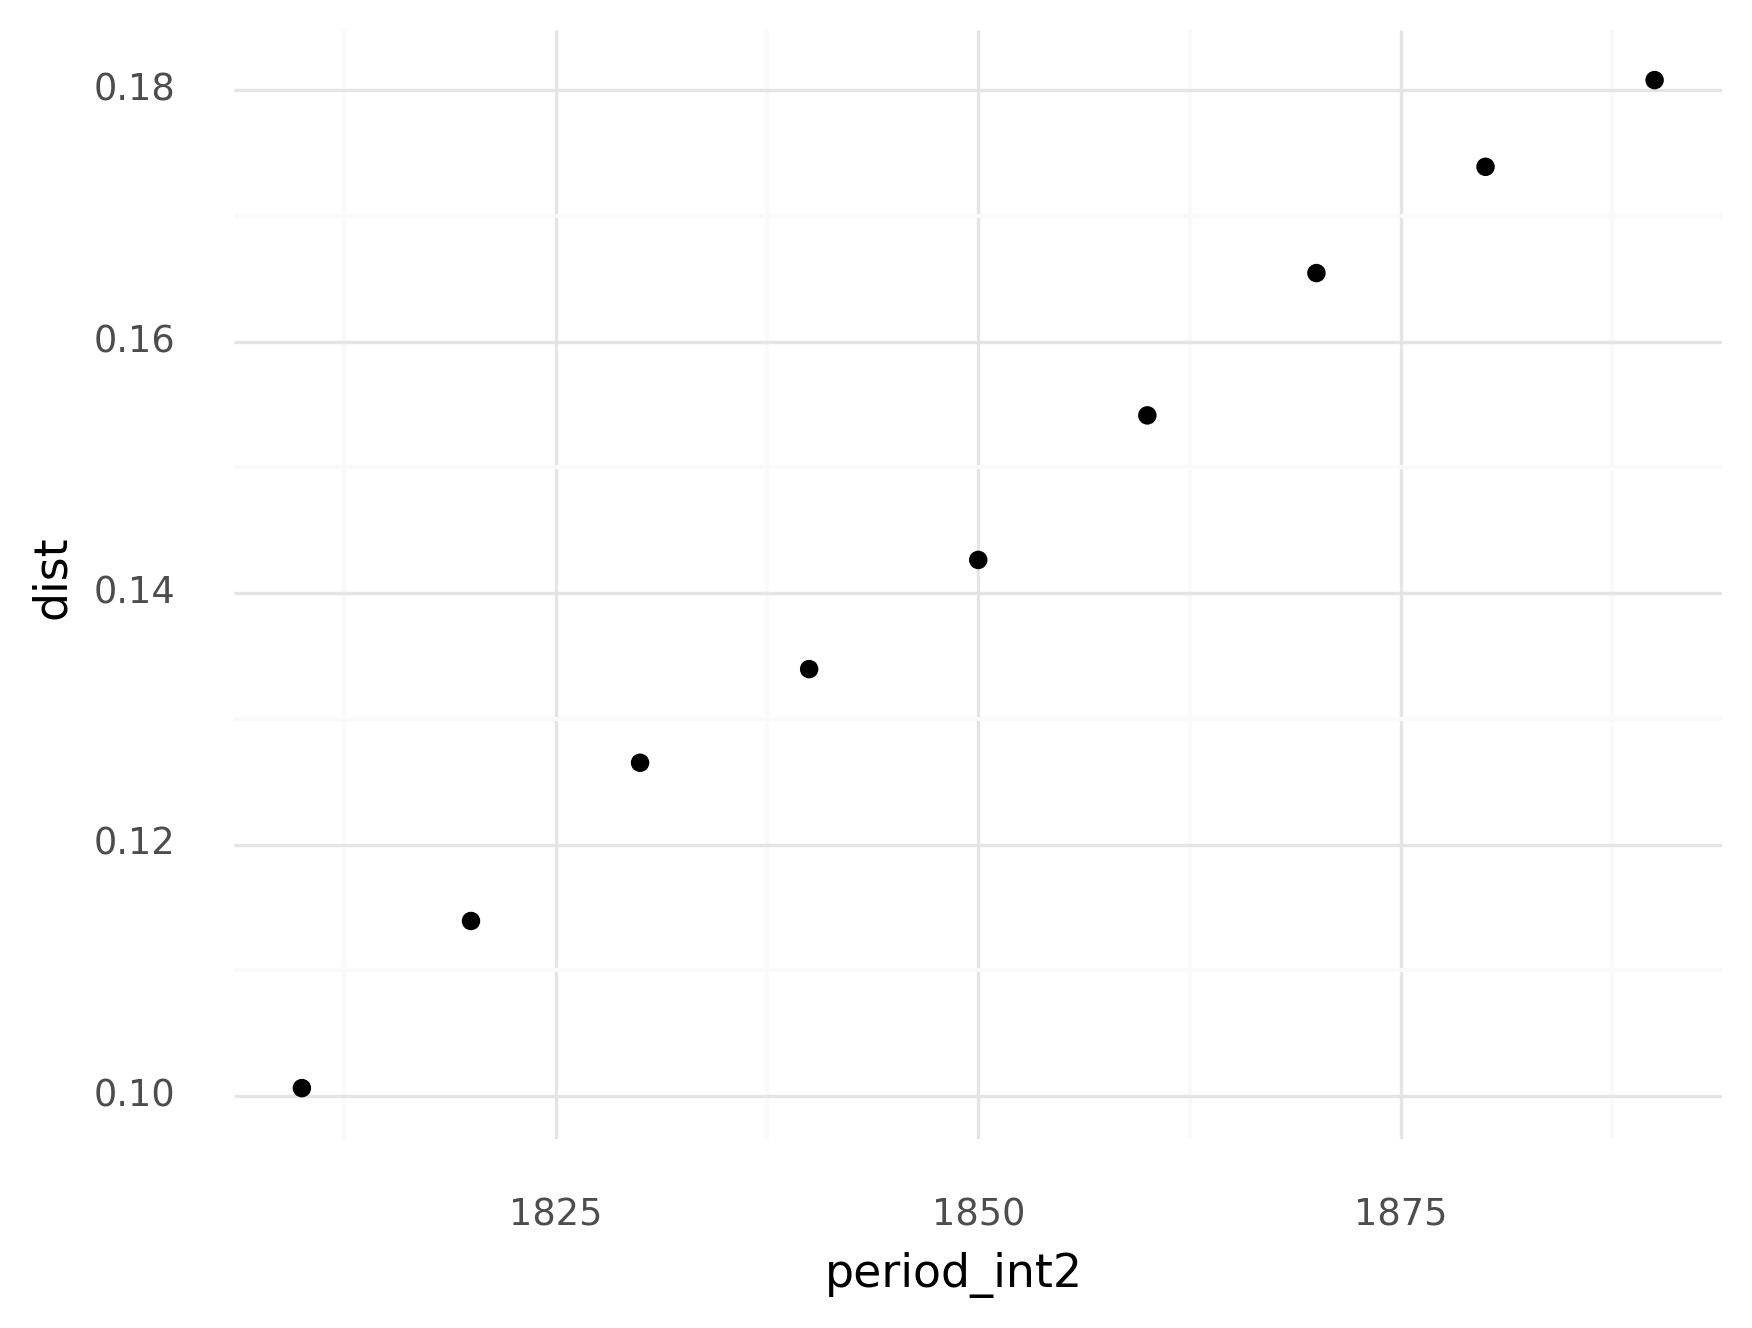

<ggplot: (8766937060201)>

In [41]:
figdf=pdf[pdf.period_int1==1800]
fig=p9.ggplot(figdf, p9.aes(x='period_int2',y='dist'))
fig+=p9.geom_point()
# fig+=p9.geom_line()
fig+=p9.theme_minimal()
fig

In [ ]:
figdf=pdf[pdf.period_int1==1800]
fig=p9.ggplot(figdf, p9.aes(x='period_int2',y='dist'))
fig+=p9.geom_point()
# fig+=p9.geom_line()
fig+=p9.theme_minimal()
fig

## Comparing words

In [8]:
wdf=df.groupby('word').mean().sort_values('perc_local',ascending=True)
wdf

,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,dist_abstractness,dist_noiseaware,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,perc2
word,,,,,,,,,,,,,,,,,,,,,
breeze,4901.357143,10.453982,-0.872882,4116.642857,5077.000000,5094.785714,5317.000000,24.986626,7.251254,6.904579,...,-0.689397,-1.075720,-1.080683,-0.645728,-1.015489,-1.033376,-0.017887,1.000000,1808.571429,10.060312
gloom,4830.660714,11.695994,-0.871116,3824.571429,5088.285714,5132.857143,5276.928571,30.810982,6.712300,5.837079,...,-0.593206,-1.120735,-1.134842,-0.635680,-0.044728,0.001172,0.045900,1.000000,1808.571429,10.413437
glow,4632.821429,14.927111,-0.808444,3503.214286,4871.071429,4892.071429,5264.928571,35.850030,10.416119,9.931203,...,-0.504503,-1.040344,-1.045688,-0.643241,-0.234710,-0.267295,-0.032585,1.000000,1808.571429,10.556039
zeal,4571.558824,9.050339,-0.983231,3699.588235,4876.176471,4864.000000,4846.470588,26.170173,2.993596,3.163794,...,-0.682624,-1.319320,-1.265467,-0.665514,1.859856,1.794480,-0.065377,0.941176,1792.941176,9.146257
piety,4391.602941,12.390216,-0.883220,3658.941176,4531.176471,4549.705882,4826.588235,26.486723,9.545172,9.310180,...,-0.688839,-1.096596,-1.077494,-0.669950,1.759206,1.709323,-0.049883,1.000000,1792.941176,9.497743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
golfing,271.500000,95.483386,4.010220,1006.000000,18.000000,16.000000,46.000000,83.219235,99.716146,99.749541,...,0.686016,5.864185,5.899368,3.591309,0.086054,-0.134349,-0.220403,1.000000,1880.000000,98.863358
countryside,72.625000,98.802553,4.947662,224.000000,13.500000,13.000000,40.000000,96.271154,99.791108,99.799457,...,3.325499,6.361348,6.454331,3.649472,-0.986537,-0.753480,0.233057,1.000000,1875.000000,98.869199
kaffir,314.650000,94.730665,4.184615,1076.400000,75.000000,73.200000,34.000000,81.927687,98.759366,98.789528,...,3.403635,3.712160,3.764927,5.857738,0.180874,0.043195,-0.137679,1.000000,1860.000000,99.347219


In [9]:
wdf.head(25)

,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,dist_abstractness,dist_noiseaware,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,perc2
word,,,,,,,,,,,,,,,,,,,,,
breeze,4901.357143,10.453982,-0.872882,4116.642857,5077.000000,5094.785714,5317.000000,24.986626,7.251254,6.904579,...,-0.689397,-1.075720,-1.080683,-0.645728,-1.015489,-1.033376,-0.017887,1.000000,1808.571429,10.060312
gloom,4830.660714,11.695994,-0.871116,3824.571429,5088.285714,5132.857143,5276.928571,30.810982,6.712300,5.837079,...,-0.593206,-1.120735,-1.134842,-0.635680,-0.044728,0.001172,0.045900,1.000000,1808.571429,10.413437
glow,4632.821429,14.927111,-0.808444,3503.214286,4871.071429,4892.071429,5264.928571,35.850030,10.416119,9.931203,...,-0.504503,-1.040344,-1.045688,-0.643241,-0.234710,-0.267295,-0.032585,1.000000,1808.571429,10.556039
zeal,4571.558824,9.050339,-0.983231,3699.588235,4876.176471,4864.000000,4846.470588,26.170173,2.993596,3.163794,...,-0.682624,-1.319320,-1.265467,-0.665514,1.859856,1.794480,-0.065377,0.941176,1792.941176,9.146257
piety,4391.602941,12.390216,-0.883220,3658.941176,4531.176471,4549.705882,4826.588235,26.486723,9.545172,9.310180,...,-0.688839,-1.096596,-1.077494,-0.669950,1.759206,1.709323,-0.049883,1.000000,1792.941176,9.497743
gi,3345.441176,31.683804,-0.507643,2976.411765,2826.294118,2772.529412,4806.529412,40.567004,40.171048,41.661985,...,-0.388608,-0.506118,-0.459583,-0.676263,-0.603747,-0.577265,0.026482,1.000000,1792.941176,10.055035
pe,3767.750000,23.938992,-0.637355,3285.882353,3455.823529,3514.647059,4814.647059,33.493102,29.275333,28.633789,...,-0.492425,-0.696195,-0.691280,-0.669518,-0.295322,-0.301934,-0.006612,0.941176,1792.941176,9.504065
blaze,4247.678571,21.864058,-0.652447,2704.142857,4507.571429,4595.500000,5183.500000,50.642557,16.763082,15.106686,...,-0.110447,-0.924524,-0.946522,-0.628294,-0.685726,-0.717476,-0.031750,1.000000,1808.571429,12.244064
gleam,4348.232143,20.837738,-0.657381,3066.714286,4512.428571,4596.071429,5217.714286,44.370986,17.743125,16.252144,...,-0.287008,-0.855166,-0.874260,-0.613091,-0.543701,-0.531888,0.011813,1.000000,1808.571429,11.400885


In [10]:
abs_z=get_dfchange_simple(col='mean1').sort_values('Abs-Conc.Median')
abs_z

,Abs-Conc.Median,Active-Passive.HGI,Ambig.NX,Collective-Indiv.RH,Freq.M,Human-Object.VG,Interp-Desc.HGI,Judg-Perc.HGI,Pleasure-Pain.HGI,Polit-Acad.HGI,Pos-Neg.HGI,Qual-Quant.HGI,Sing-Plural.M,Strong-Weak.HGI,Time-Space.HGI,Virtue-Vice.HGI,Woman-Man.VG
word,,,,,,,,,,,,,,,,,
wood,-2.239772,1.550340,-0.056971,-0.707931,0.598253,-1.896549,-2.181985,-0.694018,-1.494796,-0.127153,-2.089853,-0.370917,0.208068,0.021619,-2.222954,-1.867266,0.170232
cellar,-2.222373,1.489375,-0.079822,-0.880665,-0.249216,-1.451278,-2.343952,-0.109969,-1.496981,0.170621,-1.912026,-0.312900,-0.293021,-0.345326,-0.880475,-1.643165,0.296887
top,-2.194921,1.260508,0.112349,-0.193313,0.394547,-2.410528,-2.472234,-1.961046,-1.457314,0.164409,-2.158474,-0.220502,0.241346,-0.197852,-1.931677,-1.764405,0.647336
lace,-2.175315,1.056106,-0.106923,-1.058155,-0.047166,-1.168882,-2.085009,0.046533,-0.815950,-0.092905,-1.147388,0.080707,-0.078781,-0.543945,-1.215385,-1.039268,1.248436
park,-2.159580,1.793706,-0.236324,-1.052263,0.141983,-0.229584,-2.291485,0.007475,-0.932780,0.478871,-1.451768,0.007381,0.121866,0.043219,0.002624,-1.298317,0.486613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mankind,2.687675,-2.367515,-0.086879,2.785990,1.024389,1.270544,2.625221,-0.341465,2.446991,-0.007280,2.588246,-0.016347,NaN,0.474020,-0.391924,2.628929,-0.032820
equity,2.704236,-1.081384,0.411703,0.416924,-0.142540,1.461717,2.877574,0.093850,2.324934,1.113526,2.858906,0.141307,NaN,1.954830,0.141157,2.860220,-1.175999
prudence,2.711685,-2.061868,0.019962,0.194422,0.041016,1.588230,2.722205,-0.097725,2.908443,1.212339,2.962210,0.428823,NaN,1.286099,-0.043444,3.130754,0.021279


,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,perc2,abs_z,ever_abs
word,,,,,,,,,,,,,,,,,,,,,
breeze,4901.357143,10.453982,-0.872882,4116.642857,5077.000000,5094.785714,5317.000000,24.986626,7.251254,6.904579,...,-1.080683,-0.645728,-1.015489,-1.033376,-0.017887,1.000000,1808.571429,10.060312,-1.077139,NeverAbs
gloom,4830.660714,11.695994,-0.871116,3824.571429,5088.285714,5132.857143,5276.928571,30.810982,6.712300,5.837079,...,-1.134842,-0.635680,-0.044728,0.001172,0.045900,1.000000,1808.571429,10.413437,-0.176914,NeverAbs
glow,4632.821429,14.927111,-0.808444,3503.214286,4871.071429,4892.071429,5264.928571,35.850030,10.416119,9.931203,...,-1.045688,-0.643241,-0.234710,-0.267295,-0.032585,1.000000,1808.571429,10.556039,-0.303834,NeverAbs
zeal,4571.558824,9.050339,-0.983231,3699.588235,4876.176471,4864.000000,4846.470588,26.170173,2.993596,3.163794,...,-1.265467,-0.665514,1.859856,1.794480,-0.065377,0.941176,1792.941176,9.146257,2.492998,OnceAbs
piety,4391.602941,12.390216,-0.883220,3658.941176,4531.176471,4549.705882,4826.588235,26.486723,9.545172,9.310180,...,-1.077494,-0.669950,1.759206,1.709323,-0.049883,1.000000,1792.941176,9.497743,2.295348,OnceAbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
golfing,271.500000,95.483386,4.010220,1006.000000,18.000000,16.000000,46.000000,83.219235,99.716146,99.749541,...,5.899368,3.591309,0.086054,-0.134349,-0.220403,1.000000,1880.000000,98.863358,NaN,NeverAbs
countryside,72.625000,98.802553,4.947662,224.000000,13.500000,13.000000,40.000000,96.271154,99.791108,99.799457,...,6.454331,3.649472,-0.986537,-0.753480,0.233057,1.000000,1875.000000,98.869199,NaN,NeverAbs
kaffir,314.650000,94.730665,4.184615,1076.400000,75.000000,73.200000,34.000000,81.927687,98.759366,98.789528,...,3.764927,5.857738,0.180874,0.043195,-0.137679,1.000000,1860.000000,99.347219,NaN,NeverAbs


In [12]:
# wdf.query('abs_z>1').head(25)

### Plot

In [15]:
@interact
def i_show_word(words='growth,improvement,value,liberty,republic,progress',y='perc_local'):
    words={x.strip().lower() for x in words.split(',') if x.strip()}
    figdf=df[df.word.isin(words)][['word','period_int',y]].dropna().sort_values(['word','period_int'])
    figdf=figdf.groupby('word').rolling(3,min_periods=2).mean().reset_index()
    
    fig=p9.ggplot(
        figdf,
        p9.aes(
            x='period_int',
            y='perc_local',
            color='word')
    ) + p9.geom_point() + p9.geom_line() +p9.theme_minimal()
    return fig

interactive(children=(Text(value='growth,improvement,value,liberty,republic,progress', description='words'), T…

### Do abstract words change more?

In [25]:
# df['period_satt']=df.period_int.apply(periodize_sattelzeit)
df['period_satt']=df.period_int.apply(to_halfcent)


swdf=df.groupby(['period_satt','word']).mean().reset_index().set_index('word')
swdf['abs_z']=abs_z['Abs-Conc.Median']
words_ever_abs=get_words_ever_abs()
swdf['ever_abs']=[('OnceAbs' if w in words_ever_abs else 'NeverAbs') for w in swdf.index]
swdf=swdf.reset_index()
swdf

,word,period_satt,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,...,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,perc2,abs_z,ever_abs
0,abatement,C18e,594.5000,84.593553,1.311046,1547.50,251.00,252.50,327.0,58.383798,...,1.761340,1.661378,0.059404,0.039731,-0.019673,1.00,1735.0,93.684801,0.335347,OnceAbs
1,abbe,C18e,2633.1250,30.115450,-0.605864,2407.50,2740.00,2873.50,2511.5,40.871558,...,-0.838596,-0.525458,0.019416,0.304199,0.284783,1.00,1735.0,22.743362,0.298957,OnceAbs
2,abbey,C18e,2359.4375,31.819912,-0.576402,1997.25,2590.75,2587.25,2262.5,43.473760,...,-0.784474,-0.457860,-0.976185,-1.106180,-0.129995,1.00,1725.0,25.587012,-1.011041,NeverAbs
3,abbot,C18e,2514.1250,24.317521,-0.894546,1903.75,3080.00,2993.75,2079.0,42.949146,...,-1.309180,-0.419642,0.034684,-0.111785,-0.146469,1.00,1725.0,31.175893,-0.088761,NeverAbs
4,abdication,C18e,567.2500,82.009956,1.114264,334.50,603.50,468.00,863.0,89.992322,...,1.315288,0.578217,1.316116,0.509322,-0.806794,1.00,1725.0,72.844994,0.879508,OnceAbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21761,zest,C19l,3710.5000,37.902301,-0.387157,4190.00,3203.75,3163.25,4285.0,29.874114,...,-0.295777,-0.352883,0.611612,0.624365,0.012753,1.00,1865.0,37.638576,NaN,NeverAbs
21762,zinc,C19l,2782.5625,53.420456,-0.037375,1860.00,2378.50,2388.25,4503.5,68.865127,...,-0.051504,-0.377968,-1.279351,-1.318025,-0.038674,1.00,1865.0,33.995304,-0.434977,NeverAbs
21763,zone,C19l,2340.0625,60.872874,0.095955,2759.25,2382.00,2339.50,1879.5,53.862168,...,0.045911,0.298477,-0.745938,-0.654137,0.091801,1.00,1865.0,69.865834,-1.110246,NeverAbs
21764,zoo,C19l,526.0625,91.190646,3.481183,536.00,91.75,96.00,1380.5,91.019493,...,3.948232,2.637733,-0.920520,-0.805036,0.115484,0.75,1865.0,76.353925,-1.605930,NeverAbs


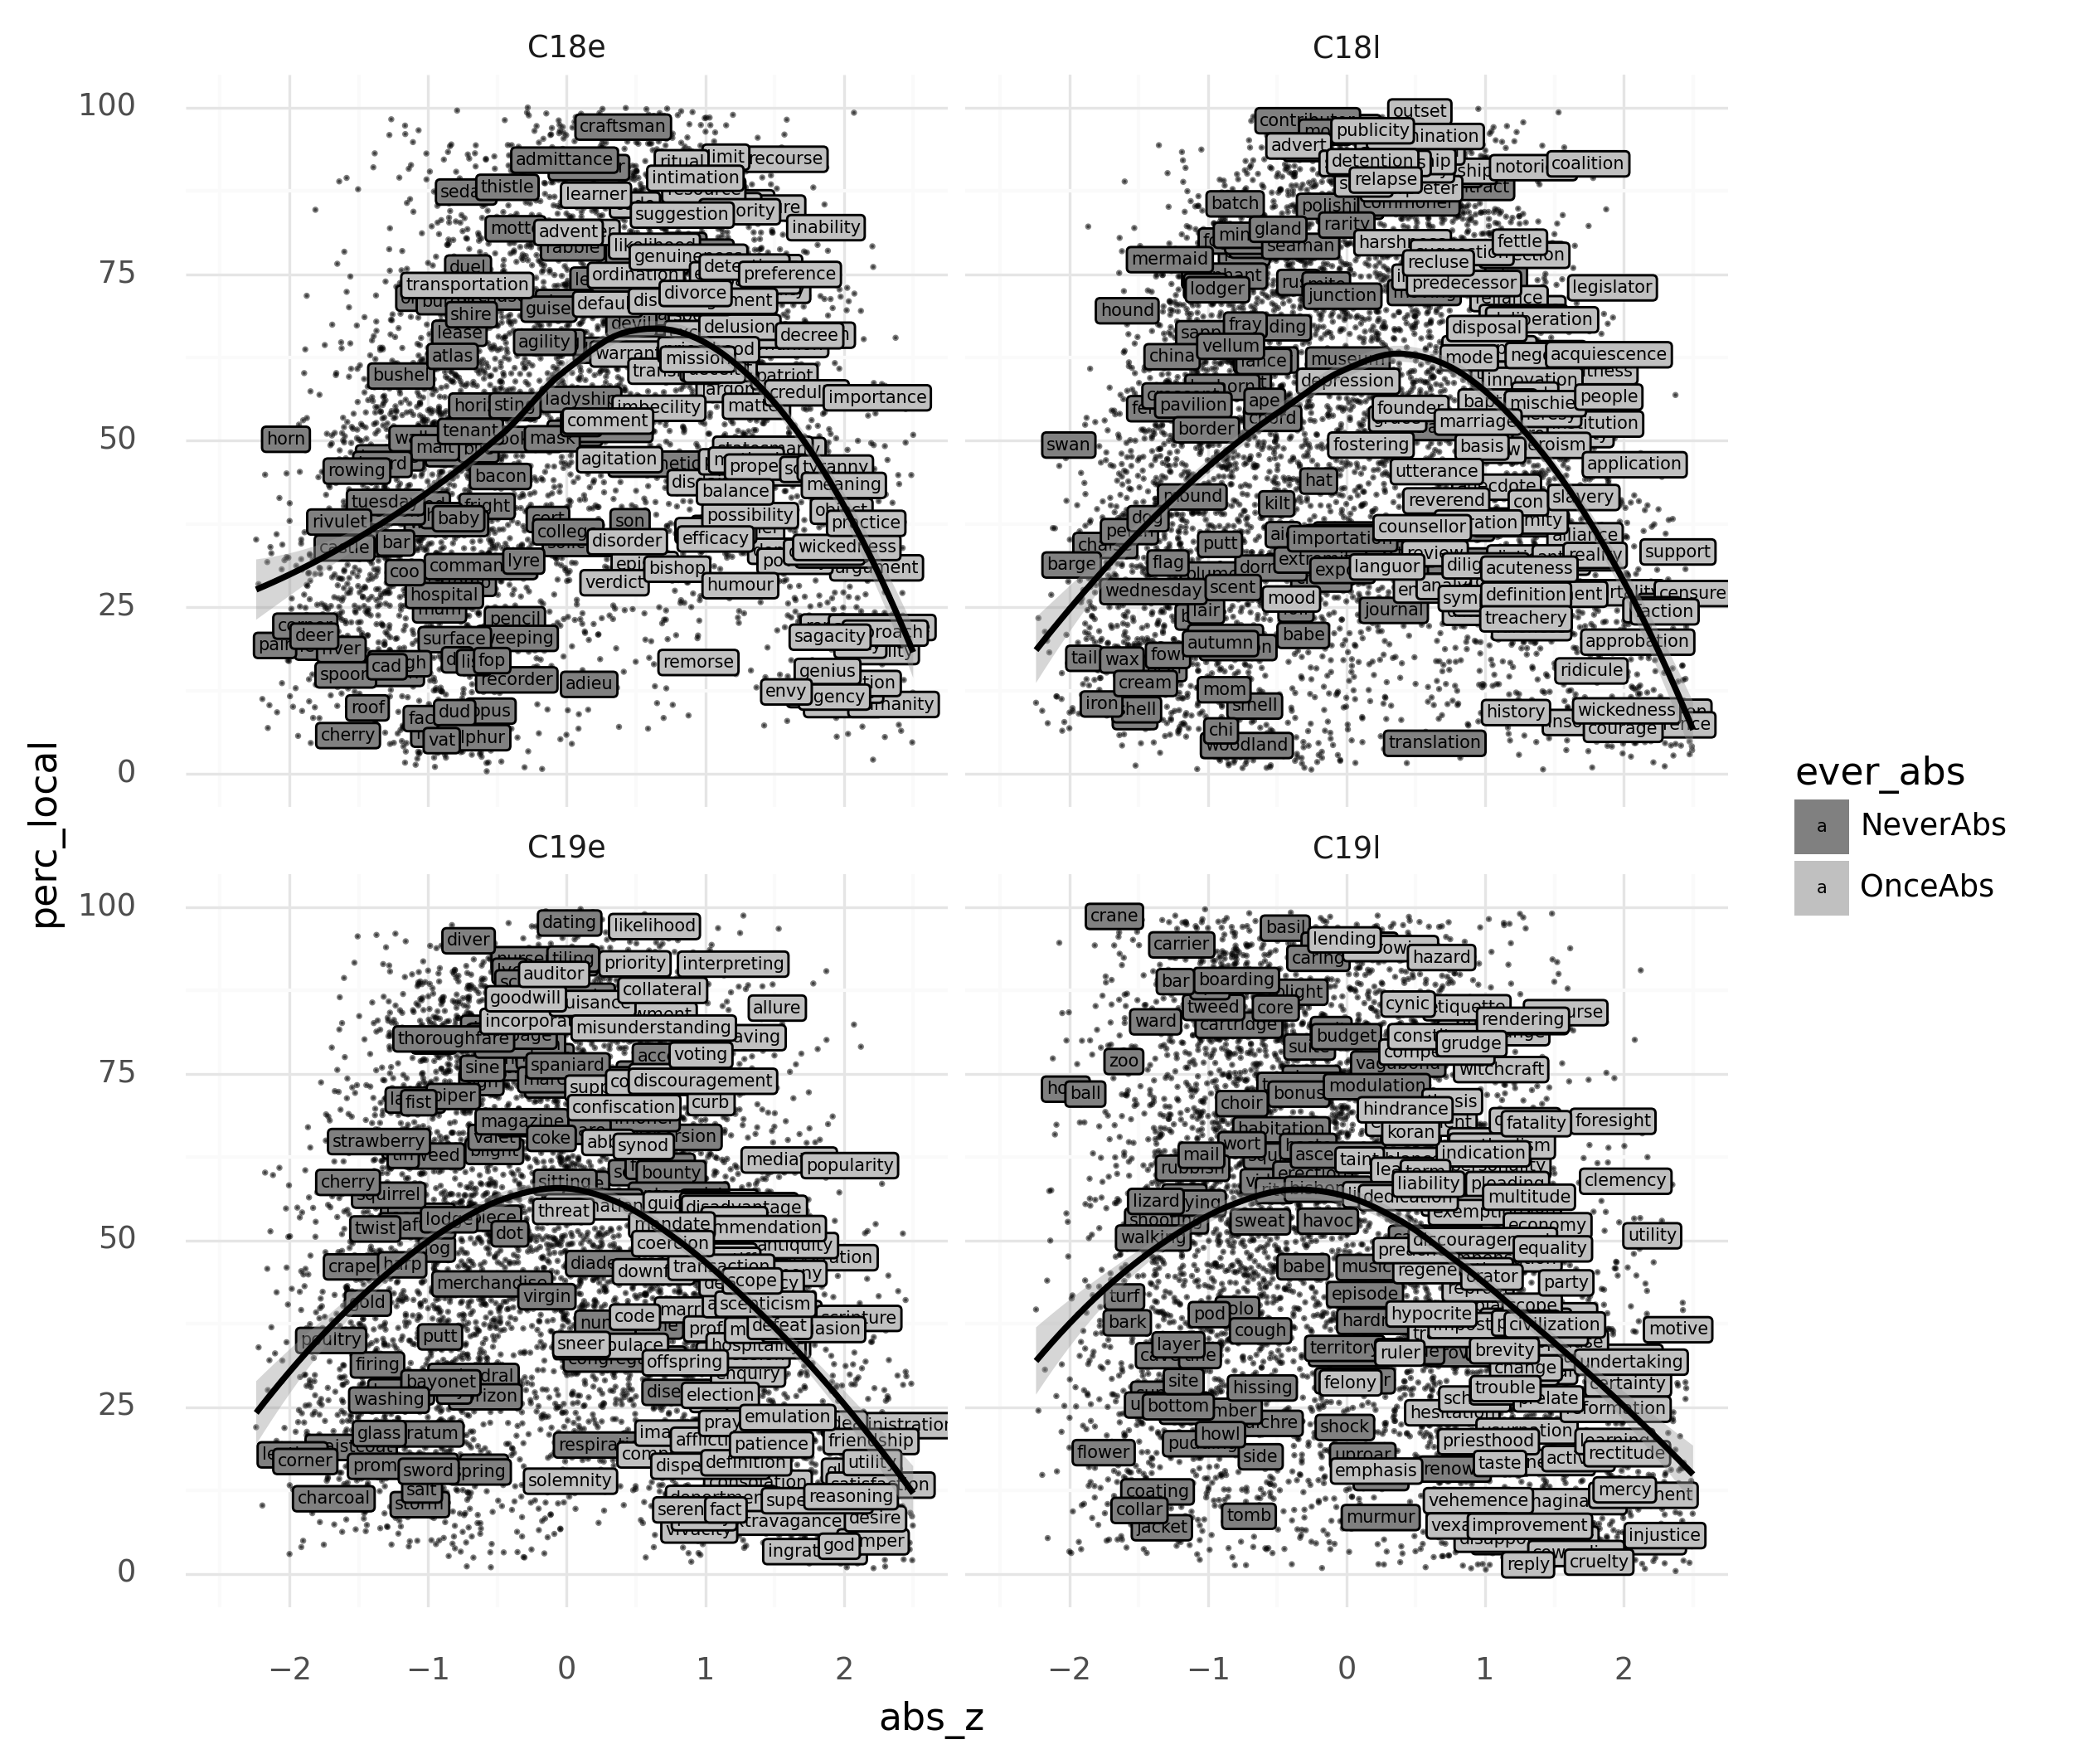

<ggplot: (8773137477753)>

In [27]:
figdf=swdf.reset_index()
labeldf=figdf.groupby(['period_satt','ever_abs']).sample(n=100)

p9.options.figure_size=8,8
fig=p9.ggplot(
    figdf,
    p9.aes(x='abs_z',y='perc_local',label='word')
)
fig+=p9.geom_point(size=.01,alpha=0.5)
# fig+=p9.ylim(-1.35,2)
fig+=p9.xlim(-2.5,2.5)
fig+=p9.geom_label(p9.aes(fill='ever_abs'),size=5, data=labeldf, alpha=1)
fig+=p9.geom_smooth(method='loess')
fig+=p9.facet_wrap('period_satt')
# fig+=p9.geom_text(size=5, data=labeldf, alpha=1)
fig+=p9.theme_minimal()
fig+=p9.scale_fill_manual({'NeverAbs':'gray','OnceAbs':'silver'})
fig

In [65]:
abswords=get_words_ever_abs()

In [66]:
wdf['is_abs']=['Abs' if x in abswords else 'NotAbs' for x in wdf.index]
wdf

,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,perc_noiseaware,perc_procrustes,...,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,perc2,abs_z,ever_abs,is_abs
word,,,,,,,,,,,,,,,,,,,,,
breeze,4901.357143,10.453982,-0.872882,4116.642857,5077.000000,5094.785714,5317.000000,24.986626,7.251254,6.904579,...,-0.645728,-1.015489,-1.033376,-0.017887,1.000000,1808.571429,10.060312,-1.077139,NeverAbs,NotAbs
gloom,4830.660714,11.695994,-0.871116,3824.571429,5088.285714,5132.857143,5276.928571,30.810982,6.712300,5.837079,...,-0.635680,-0.044728,0.001172,0.045900,1.000000,1808.571429,10.413437,-0.176914,NeverAbs,NotAbs
glow,4632.821429,14.927111,-0.808444,3503.214286,4871.071429,4892.071429,5264.928571,35.850030,10.416119,9.931203,...,-0.643241,-0.234710,-0.267295,-0.032585,1.000000,1808.571429,10.556039,-0.303834,NeverAbs,NotAbs
zeal,4571.558824,9.050339,-0.983231,3699.588235,4876.176471,4864.000000,4846.470588,26.170173,2.993596,3.163794,...,-0.665514,1.859856,1.794480,-0.065377,0.941176,1792.941176,9.146257,2.492998,OnceAbs,Abs
piety,4391.602941,12.390216,-0.883220,3658.941176,4531.176471,4549.705882,4826.588235,26.486723,9.545172,9.310180,...,-0.669950,1.759206,1.709323,-0.049883,1.000000,1792.941176,9.497743,2.295348,OnceAbs,Abs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
golfing,271.500000,95.483386,4.010220,1006.000000,18.000000,16.000000,46.000000,83.219235,99.716146,99.749541,...,3.591309,0.086054,-0.134349,-0.220403,1.000000,1880.000000,98.863358,NaN,NeverAbs,NotAbs
countryside,72.625000,98.802553,4.947662,224.000000,13.500000,13.000000,40.000000,96.271154,99.791108,99.799457,...,3.649472,-0.986537,-0.753480,0.233057,1.000000,1875.000000,98.869199,NaN,NeverAbs,NotAbs
kaffir,314.650000,94.730665,4.184615,1076.400000,75.000000,73.200000,34.000000,81.927687,98.759366,98.789528,...,5.857738,0.180874,0.043195,-0.137679,1.000000,1860.000000,99.347219,NaN,NeverAbs,NotAbs


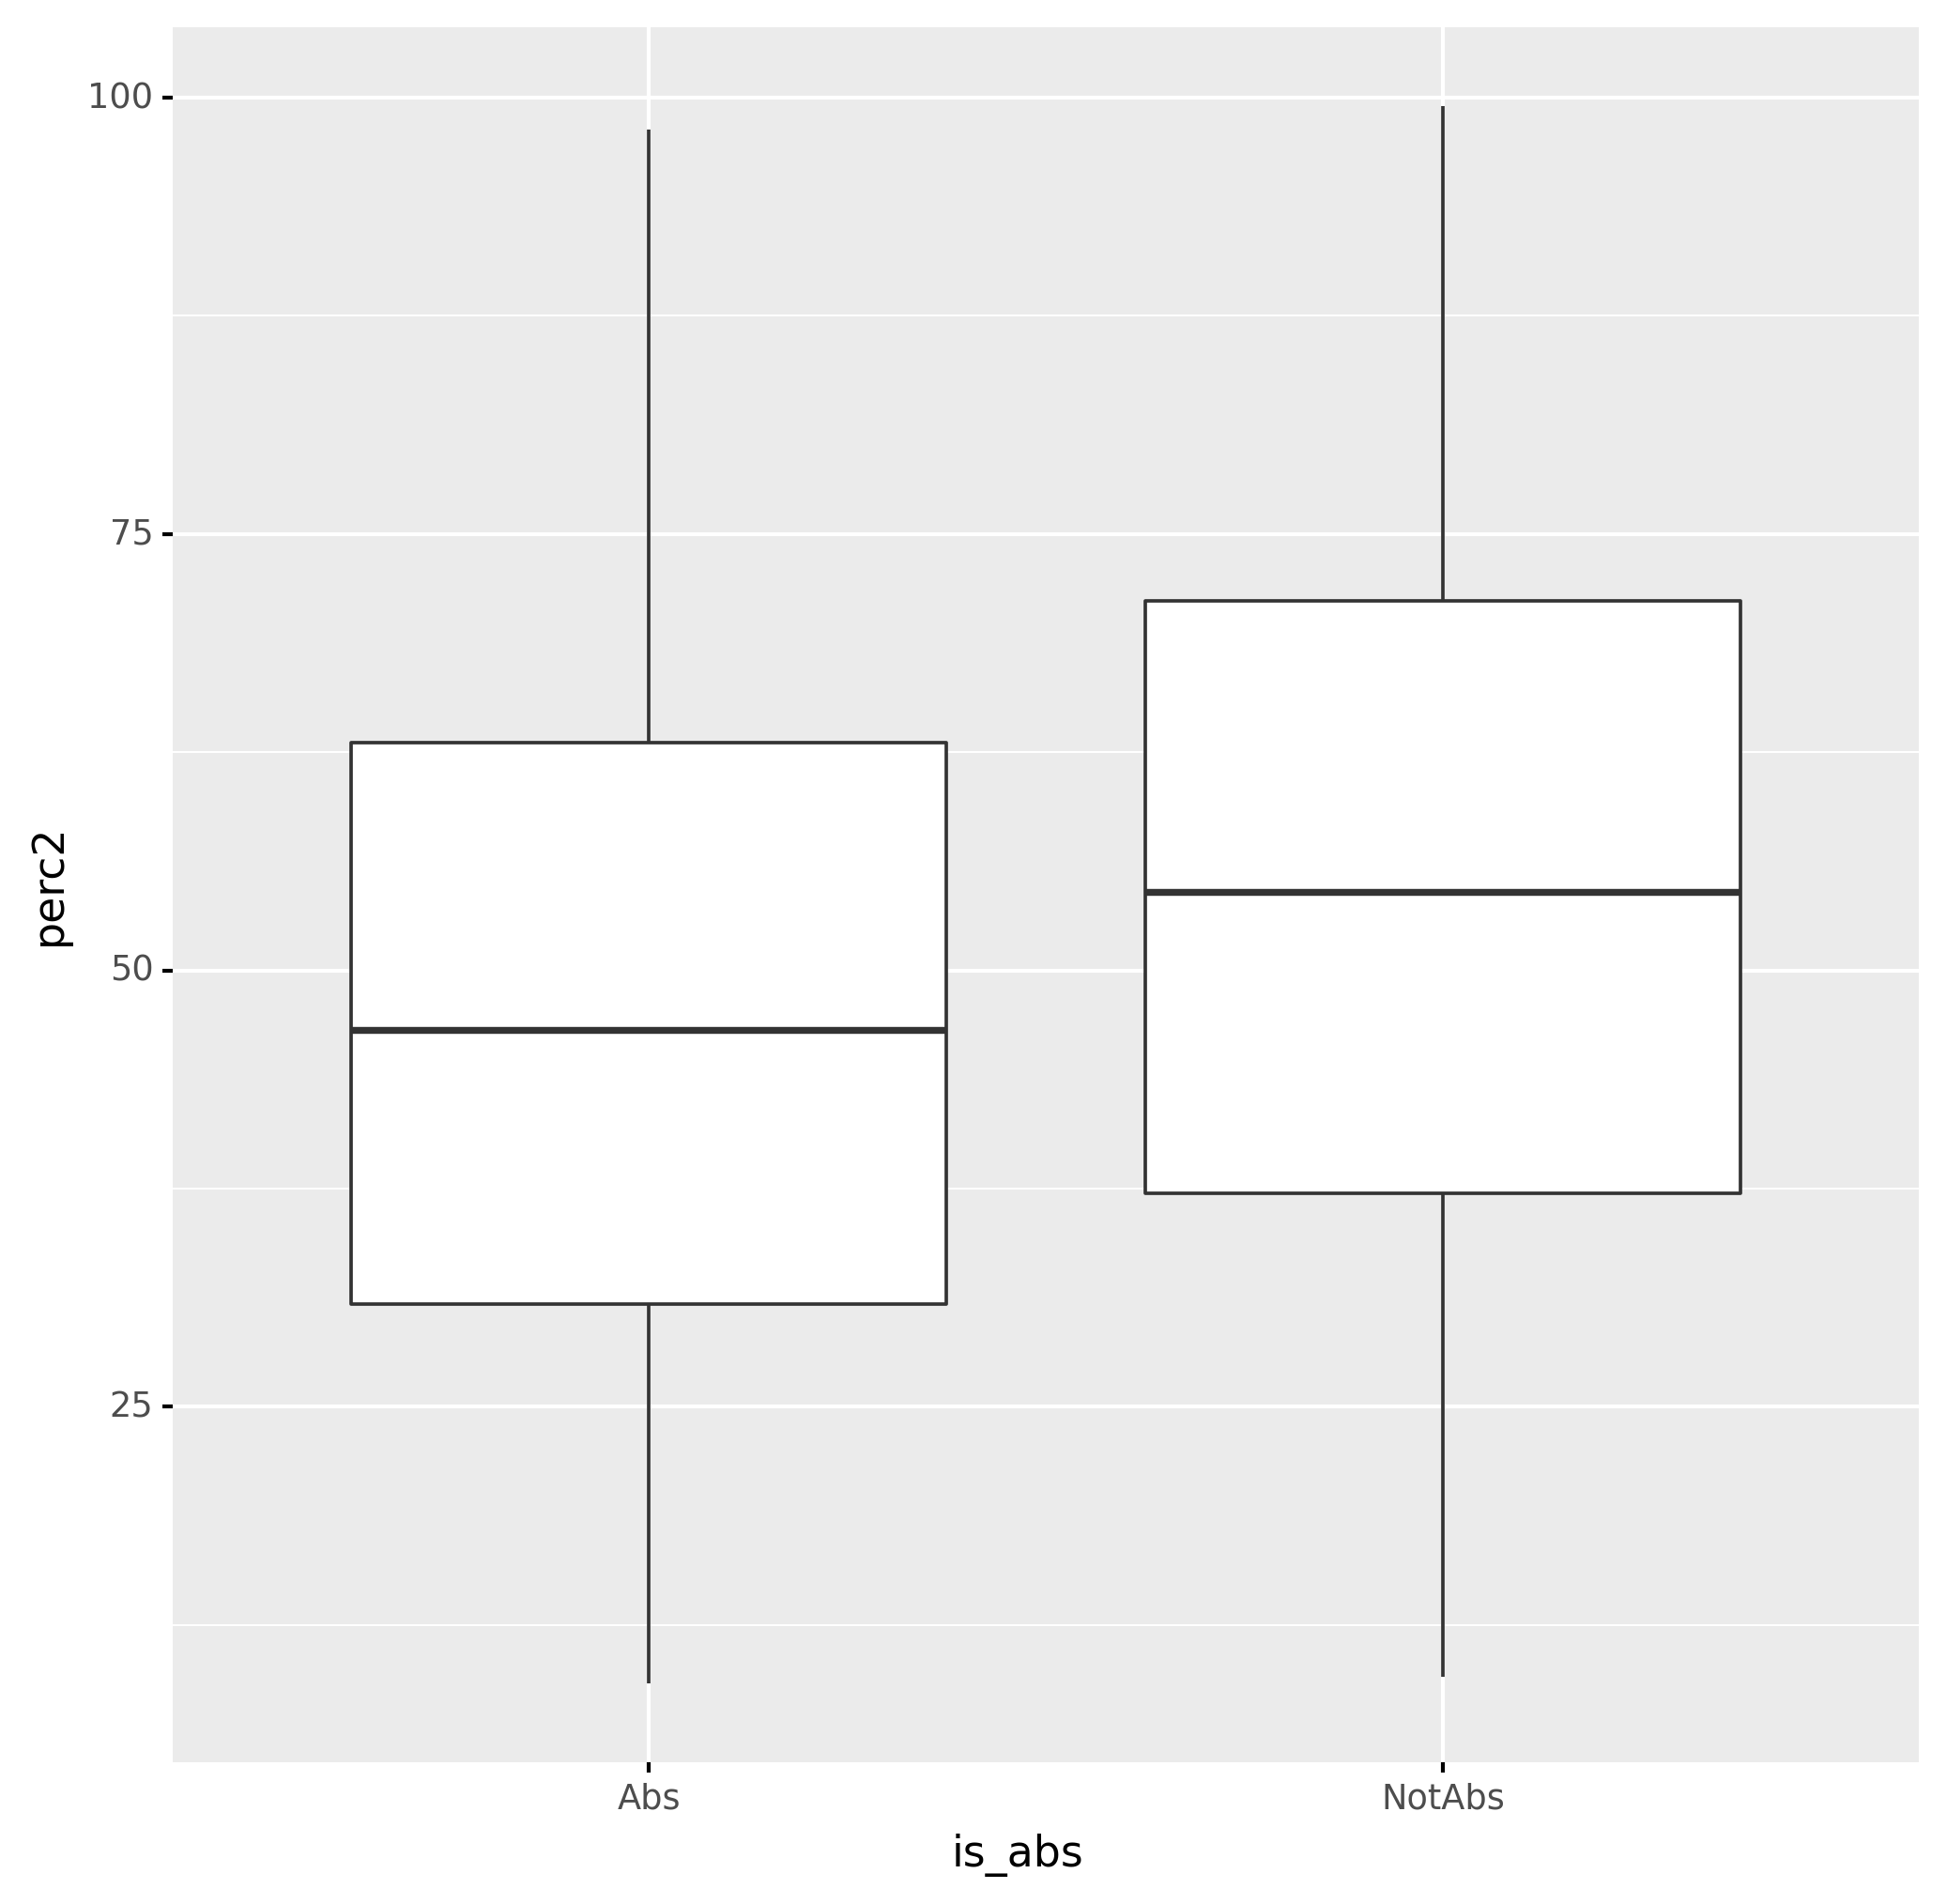

<ggplot: (8740342805857)>

In [67]:
fig=p9.ggplot(wdf, p9.aes(x='is_abs',y='perc2'))
fig+=p9.geom_boxplot()
fig

# Word boxplots?

In [68]:
pwdf=df.groupby(['period','word']).mean()
pwdf

rank       perc      dist  rank_abstractness  \
period       word                                                          
1700s->1710s abbey       1270.50  57.313383  0.069394              550.0   
             abbot       2483.00  16.543376 -1.004516             1947.0   
             abdication   940.25  68.417956  0.392115              446.0   
             abhorrence   953.50  67.972428  0.336998              481.0   
             ability      751.25  74.773033  0.555452              660.0   
...                          ...        ...       ...                ...   
1870s->1880s zest        3990.00  33.394557 -0.464658             4864.0   
             zinc        2896.50  51.653031 -0.142794             2464.0   
             zone        3243.00  45.867424 -0.329695             3948.0   
             zoo           12.75  99.803807  7.082957               19.0   
             zoology     1423.75  76.243947  0.298290             1326.0   

                         rank_noiseaware  rank_procrustes  rank_local  \
period       word                                                       
1700s->1710s abbey                1680.0           1694.0      1158.0   
             abbot                2834.0           2725.0      2426.0   
             abdication           1021.0            827.0      1467.0   
             abhorrence           1260.0           1041.0      1032.0   
             ability               640.0            509.0      1196.0   
...                                  ...              ...         ...   
1870s->1880s zest                 3450.0           3495.0      4151.0   
             zinc                 2444.0           2430.0      4248.0   
             zone                 3207.0           3201.0      2616.0   
             zoo                    10.0             12.0        10.0   
             zoology              1622.0           1640.0      1107.0   

                         perc_abstractness  perc_noiseaware  perc_procrustes  \
period       word                                                              
1700s->1710s abbey               81.540013        43.544048        43.073302   
             abbot               34.566241         4.741089         8.406187   
             abdication          85.036987        65.702757        72.225958   
             abhorrence          83.860121        57.666443        65.030262   
             ability             77.841291        78.513786        82.918628   
...                                    ...              ...              ...   
1870s->1880s zest                18.801135        42.411087        41.659709   
             zinc                58.874603        59.208549        59.442311   
             zone                34.095842        46.468526        46.568709   
             zoo                 99.699449        99.849724        99.816330   
             zoology             77.876106        72.933712        72.633161   

                         ...  dist_abstractness  dist_noiseaware  \
period       word        ...                                       
1700s->1710s abbey       ...           0.869422        -0.240646   
             abbot       ...          -0.578048        -1.478884   
             abdication  ...           1.044564         0.294725   
             abhorrence  ...           0.971554         0.099966   
             ability     ...           0.682457         0.726658   
...                      ...                ...              ...   
1870s->1880s zest        ...          -0.766432        -0.375124   
             zinc        ...          -0.088511        -0.074849   
             zone        ...          -0.539322        -0.308217   
             zoo         ...           5.469729         6.517564   
             zoology     ...           0.453950         0.279110   

                         dist_procrustes  dist_local  score1_abstractness  \
period       word                                                           
1700s->17

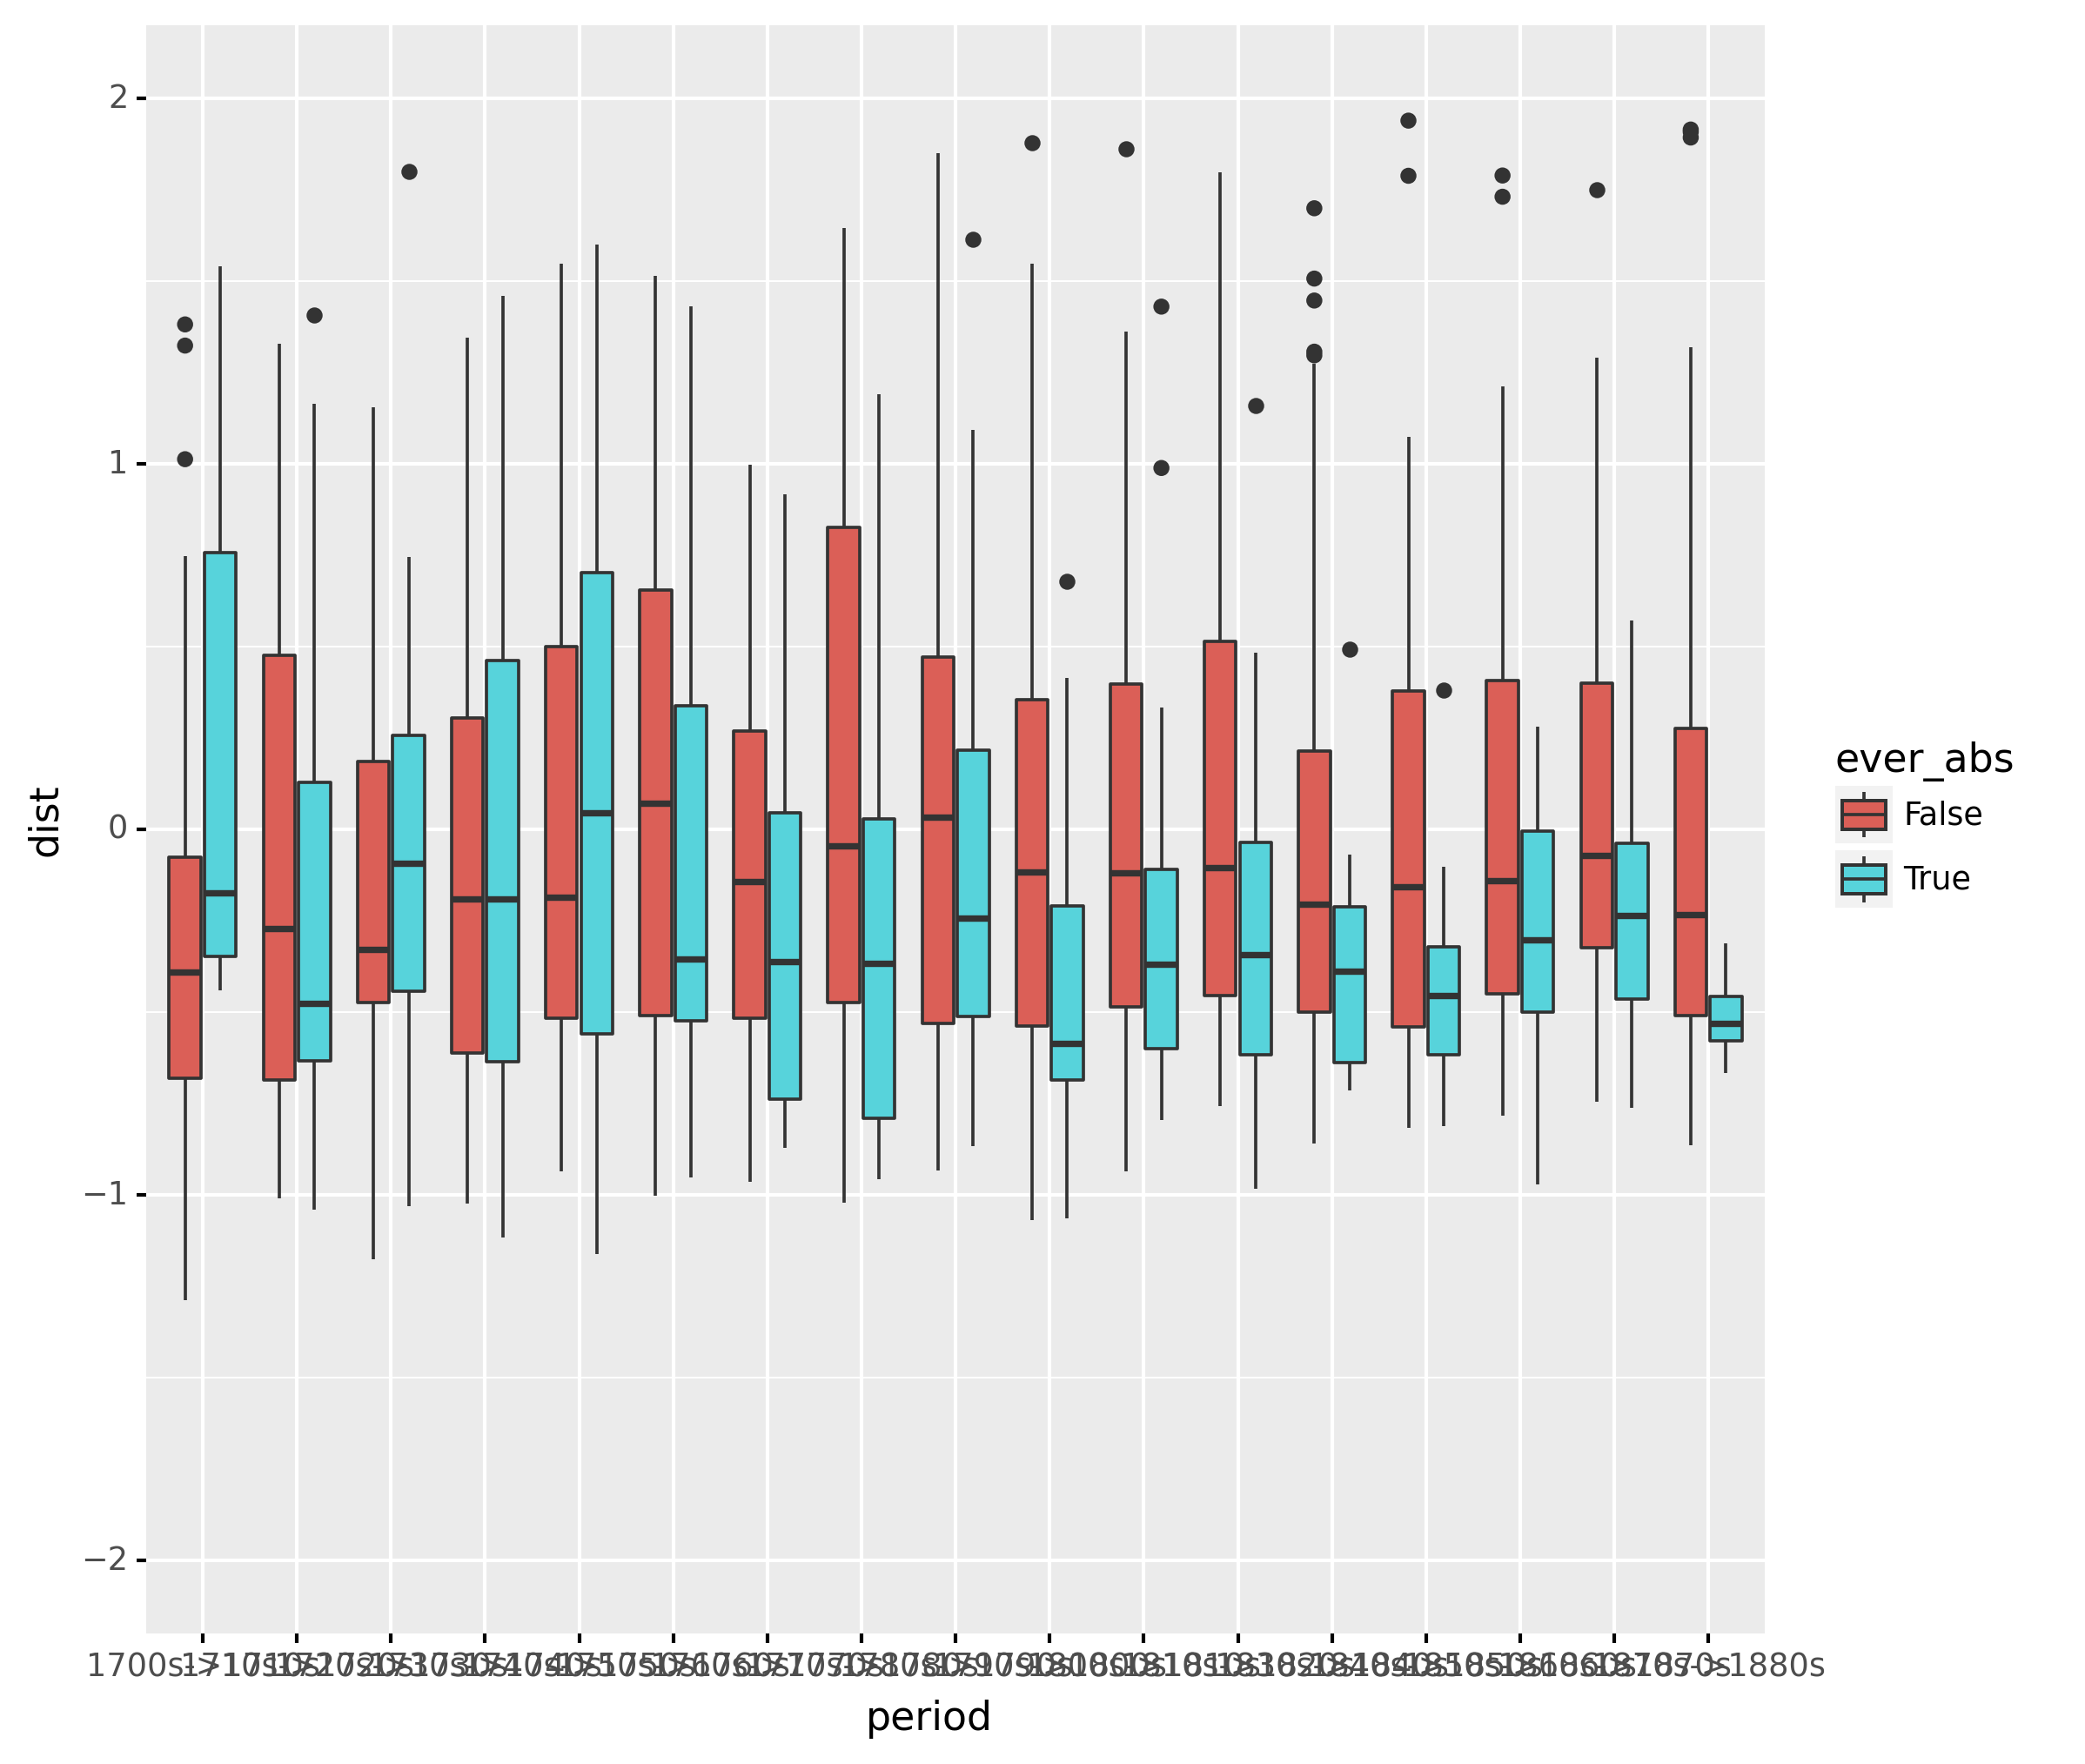

<ggplot: (8740342784565)>

In [69]:
figdf=pwdf.reset_index().sample(n=1000)
figdf['ever_abs']=figdf.word.apply(lambda x: x in words_ever_abs)
p9.ggplot(
    figdf, p9.aes(x='period',y='dist',fill='ever_abs')
) + p9.geom_boxplot() + p9.ylim(-2,2)

In [168]:
figdf

,period,word,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,perc_abstractness,...,dist_abstractness,dist_noiseaware,dist_procrustes,dist_local,score1_abstractness,score2_abstractness,score_diff_abstractness,is_clean_noiseaware,period_int,ever_abs
46882,1800s->1810s,illusion,2839.25,50.241059,-0.102510,3499.0,2365.0,2364.0,3129.0,38.674614,...,-0.481485,-0.072678,-0.081318,0.225442,0.796774,0.900392,0.103618,True,1810,True
11899,1730s->1740s,patron,3085.75,29.796313,-0.624579,4306.0,3597.0,3587.0,853.0,2.025489,...,-1.168468,-0.966156,-0.986022,0.622330,1.513447,1.521549,0.008102,True,1740,True
4221,1710s->1720s,herd,918.75,68.602463,0.636160,354.0,619.0,613.0,2089.0,87.923366,...,1.215021,0.733493,0.741672,-0.145545,0.298907,-0.482863,-0.781770,True,1720,False
69325,1850s->1860s,dissertation,2936.25,50.825096,-0.196133,2222.0,4382.0,4388.0,753.0,62.791087,...,-0.001022,-0.615006,-0.611814,0.443309,0.643221,0.510425,-0.132796,True,1860,False
76721,1860s->1870s,ledger,2453.00,58.996656,0.464921,3660.0,485.0,518.0,5149.0,38.812709,...,-0.475322,1.342269,1.265530,-0.272794,-0.660377,-0.591267,0.069110,True,1870,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39742,1790s->1800s,collier,1416.25,74.296222,0.446476,442.0,2705.0,2512.0,6.0,91.990556,...,1.519682,-0.245569,-0.165710,0.677503,-0.977403,-0.455819,0.521584,True,1800,False
19347,1750s->1760s,disdain,2664.00,46.472362,-0.342030,3205.0,3650.0,3715.0,86.0,35.597990,...,-0.554821,-0.785013,-0.816823,0.788536,1.092014,0.966239,-0.125775,True,1760,True
21608,1750s->1760s,quarry,2454.25,50.688442,-0.191844,1983.0,3424.0,3452.0,958.0,60.160804,...,-0.037634,-0.660359,-0.688829,0.619444,-1.736808,-1.978052,-0.241245,True,1760,False
50176,1810s->1820s,annexation,1590.50,72.618432,1.474954,62.0,510.0,494.0,5296.0,98.949182,...,3.634431,1.428840,1.450066,-0.613520,0.821901,0.016281,-0.805620,True,1820,False
